In [26]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import squarify as sq
import json
import plotly.express as px
from plotnine import *
import warnings
from wordcloud import WordCloud
from plotly.tools import mpl_to_plotly as ggplotly
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, LogisticRegression
from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score
warnings.filterwarnings('ignore')

In [152]:
!pip install CatBoost

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [16]:
!pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\91836\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~ywin32_system32\\pythoncom38.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Install

In [12]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip install plotnine

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [78]:
!pip install descartes

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [99]:
!pip install squarify

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [67]:
!pip install plotly

You should consider upgrading via the 'c:\users\91836\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
data_cleaned = pd.read_csv("D://C Drive Documents//Mass Mobilization Protests//MassMobilizationProtests_cleaned.csv")

In [3]:
data = data_cleaned.loc[data_cleaned['protestduration'] <= 50 ,:]
data.index = list(range(data.shape[0]))
data = data.drop(['Unnamed: 0'],axis=1)
category_mapping = {'50-99':1,
                '100-999':2,
                '1000-1999':3,
                '2000-4999':4,
               '5000-10000':5,
               '>10000':6}

inverse_category_mapping = {1:'50-99',
                2:'100-999',
                3:'1000-1999',
                4:'2000-4999',
               5:'5000-10000',
               6:'>10000'}

stateresponse_category_mapping = {'accomodation':1,
                'arrests':2,
                'beatings':3,
                'crowd dispersal':4,
               'ignore':5,
               'killings':6,
                  'shootings':7 }

stateresponse_inverse_category_mapping = {1:'accomodation',
                2:'arrests',
                3:'beatings',
                4:'crowd dispersal',
               5:'ignore',
               6:'killings',
                  7:'shootings'}
data["stateresponse1"] = data["stateresponse1"].replace(stateresponse_category_mapping)

In [22]:
data = pd.read_csv("C://Users//91836//Downloads//dataverse_files//mmALL_073120_csv.csv")

In [3]:
data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...


## Missing Values

In [10]:
data.isna().sum()

id                           0
country                      0
ccode                        0
year                         0
region                       0
protest                      0
protestnumber                0
startday                  1906
startmonth                1906
startyear                 1906
endday                    1906
endmonth                  1906
endyear                   1906
protesterviolence         1387
location                  1927
participants_category     7258
participants              1399
protesteridentity         2461
protesterdemand1          1907
protesterdemand2         14168
protesterdemand3         16762
protesterdemand4         16314
stateresponse1            1937
stateresponse2           14257
stateresponse3           16215
stateresponse4           16901
stateresponse5           16296
stateresponse6           17129
stateresponse7           16225
sources                   1910
notes                     1952
dtype: int64

6 rows with the same number of missing values seems strange. Let's check it out

In [11]:
data.isna().sum()/data.shape[0] * 100

id                        0.000000
country                   0.000000
ccode                     0.000000
year                      0.000000
region                    0.000000
protest                   0.000000
protestnumber             0.000000
startday                 11.116944
startmonth               11.116944
startyear                11.116944
endday                   11.116944
endmonth                 11.116944
endyear                  11.116944
protesterviolence         8.089822
location                 11.239428
participants_category    42.333042
participants              8.159813
protesteridentity        14.354039
protesterdemand1         11.122776
protesterdemand2         82.636337
protesterdemand3         97.766113
protesterdemand4         95.153106
stateresponse1           11.297754
stateresponse2           83.155439
stateresponse3           94.575678
stateresponse4           98.576845
stateresponse5           95.048119
stateresponse6           99.906678
stateresponse7      

For now let's ignore the missing values in **location, participants,protesteridentity,sources and notes** as it is as we are not modelling or anything right away and the missing percentage isnt that high!

In [12]:
data.loc[data.startday.isna(),:].isna().sum()

id                          0
country                     0
ccode                       0
year                        0
region                      0
protest                     0
protestnumber               0
startday                 1906
startmonth               1906
startyear                1906
endday                   1906
endmonth                 1906
endyear                  1906
protesterviolence        1387
location                 1906
participants_category    1906
participants             1387
protesteridentity        1906
protesterdemand1         1906
protesterdemand2         1906
protesterdemand3         1906
protesterdemand4         1854
stateresponse1           1906
stateresponse2           1906
stateresponse3           1906
stateresponse4           1906
stateresponse5           1854
stateresponse6           1906
stateresponse7           1843
sources                  1906
notes                    1906
dtype: int64

most of the columns have all missing values anyways so let's drop them

In [3]:
data = data.loc[data.startday.notna(),:]
data.index = list(range(data.shape[0]))

In [14]:
data.isna().sum()

id                           0
country                      0
ccode                        0
year                         0
region                       0
protest                      0
protestnumber                0
startday                     0
startmonth                   0
startyear                    0
endday                       0
endmonth                     0
endyear                      0
protesterviolence            0
location                    21
participants_category     5352
participants                12
protesteridentity          555
protesterdemand1             1
protesterdemand2         12262
protesterdemand3         14856
protesterdemand4         14460
stateresponse1              31
stateresponse2           12351
stateresponse3           14309
stateresponse4           14995
stateresponse5           14442
stateresponse6           15223
stateresponse7           14382
sources                      4
notes                       46
dtype: int64

In [15]:
data.isna().sum()/data.shape[0] * 100

id                        0.000000
country                   0.000000
ccode                     0.000000
year                      0.000000
region                    0.000000
protest                   0.000000
protestnumber             0.000000
startday                  0.000000
startmonth                0.000000
startyear                 0.000000
endday                    0.000000
endmonth                  0.000000
endyear                   0.000000
protesterviolence         0.000000
location                  0.137804
participants_category    35.120415
participants              0.078745
protesteridentity         3.641971
protesterdemand1          0.006562
protesterdemand2         80.464597
protesterdemand3         97.486712
protesterdemand4         94.888116
stateresponse1            0.203425
stateresponse2           81.048625
stateresponse3           93.897237
stateresponse4           98.398845
stateresponse5           94.769998
stateresponse6           99.895006
stateresponse7      

Let's impute missing values for **participants_category** using KNN classifier

In [4]:
category_mapping = {'50-99':1,
                '100-999':2,
                '1000-1999':3,
                '2000-4999':4,
               '5000-10000':5,
               '>10000':6}

inverse_category_mapping = {1:'50-99',
                2:'100-999',
                3:'1000-1999',
                4:'2000-4999',
               5:'5000-10000',
               6:'>10000'}

data["participants_category"].replace(category_mapping)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15234    2.0
15235    3.0
15236    1.0
15237    1.0
15238    2.0
Name: participants_category, Length: 15239, dtype: float64

In [17]:
[col for col in data.columns if data[col].dtype != 'object']

['id',
 'ccode',
 'year',
 'protest',
 'protestnumber',
 'startday',
 'startmonth',
 'startyear',
 'endday',
 'endmonth',
 'endyear',
 'protesterviolence']

In [5]:
y_knn_test = data.loc[data["participants_category"].isnull(),"participants_category"].replace(category_mapping)
X_knn_test = data.loc[data["participants_category"].isnull(),[col for col in data.columns if data[col].dtype != 'object']]
y_knn_train = data.loc[data["participants_category"].notnull(),"participants_category"].replace(category_mapping)
X_knn_train = data.loc[data["participants_category"].notnull(),[col for col in data.columns if data[col].dtype != 'object']]
knnClassifier = KNeighborsClassifier().fit(X_knn_train,y_knn_train)
pd.Series(knnClassifier.predict(X_knn_test),index = X_knn_test.index)
data.loc[data["participants_category"].isnull(),"participants_category"] = pd.Series(knnClassifier.predict(X_knn_test),index = X_knn_test.index).replace(inverse_category_mapping)

In [6]:
data = data.loc[data.protesterdemand1.notnull(),:]

In [7]:
data = data.loc[data.stateresponse1.notnull(),:]

In [8]:
data.index = list(range(data.shape[0]))

In [9]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            15198, 15199, 15200, 15201, 15202, 15203, 15204, 15205, 15206,
            15207],
           dtype='int64', length=15208)

# Data Inconsistencies Check

In [19]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [20]:
for col in data.columns:
    print(data[col].value_counts(),"\n")

201990001     1
5602007002    1
5602001005    1
5602002001    1
5602002002    1
             ..
3171995003    1
3171996001    1
3171996002    1
3171996003    1
9102017003    1
Name: id, Length: 15239, dtype: int64 

United Kingdom    578
France            547
Ireland           431
Germany           364
Kenya             350
                 ... 
Germany West        2
Laos                2
Bhutan              2
Qatar               1
South Sudan         1
Name: country, Length: 166, dtype: int64 

200    578
220    547
205    431
255    364
501    350
      ... 
812      2
402      2
678      1
694      1
525      1
Name: ccode, Length: 168, dtype: int64 

2015    857
2019    814
2014    769
2016    713
2018    698
2011    688
2013    586
1990    572
2012    553
2017    541
2005    497
2000    488
1997    488
2006    454
2010    452
2007    445
1998    442
2004    442
2002    415
1999    411
1996    409
1992    409
2008    398
2001    393
1994    390
2003    387
2009    376
1991    372
1

# participants and location needs to be cleaned

In [21]:
for col in data.columns:
    print(data[col].unique(),"\n")

[ 201990001  201990002  201990003 ... 9102017001 9102017002 9102017003] 

['Canada' 'Cuba' 'Haiti' 'Dominican Republic' 'Jamaica' 'Mexico'
 'Guatemala' 'Honduras' 'El Salvador' 'Nicaragua' 'Costa Rica' 'Panama'
 'Colombia' 'Venezuela' 'Guyana' 'Suriname' 'Ecuador' 'Peru' 'Brazil'
 'Bolivia' 'Paraguay' 'Chile' 'Argentina' 'Uruguay' 'United Kingdom'
 'Ireland' 'Netherlands' 'Belgium' 'Luxembourg' 'France' 'Switzerland'
 'Spain' 'Portugal' 'Germany' 'Germany West' 'Germany East' 'Poland'
 'Austria' 'Hungary' 'Czechoslovakia' 'Czech Republic' 'Slovak Republic'
 'Italy' 'Albania' 'Kosovo' 'Serbia' 'Macedonia' 'Croatia' 'Yugoslavia'
 'Bosnia' 'Serbia and Montenegro' 'Montenegro' 'Slovenia' 'Greece'
 'Cyprus' 'Bulgaria' 'Moldova' 'Romania' 'USSR' 'Russia' 'Estonia'
 'Latvia' 'Lithuania' 'Ukraine' 'Belarus' 'Armenia' 'Georgia' 'Azerbaijan'
 'Finland' 'Sweden' 'Norway' 'Denmark' 'Cape Verde' 'Guinea-Bissau'
 'Equatorial Guinea' 'Gambia' 'Mali' 'Senegal' 'Benin' 'Mauritania'
 'Niger' 'Ivory Coas

In [22]:
data.participants.value_counts().head(50)

100s                 1330
1000s                1187
50+                  1138
50                   1005
1000                  978
>50                   936
100                   834
10000                 406
200                   397
2000                  351
100+                  342
thousands             330
300                   283
500                   272
5000                  252
10000s                243
hundreds              237
3000                  233
tens of thousands     191
20000                 174
150                   131
4000                  128
400                   122
100000                116
30000                  97
15000                  96
50000                  89
dozens                 86
1500                   85
> 50                   82
1000+                  80
6000                   80
>100                   75
7000                   67
Thousands              63
8000                   61
60                     60
700                    57
250         

In [10]:
data.loc[data.participants == "100+","participants"] = "100s"

data.loc[data.participants == "hundreds","participants"] = "100s"

data.loc[data.participants == "Hundreds","participants"] = "100s"

data.loc[data.participants == ">100","participants"] = "100s"

data.loc[data.participants == "several hundred","participants"] = "100s"

data.loc[data.participants == "thousands","participants"] = "1000s"

data.loc[data.participants == "1000+","participants"] = "1000s"

data.loc[data.participants == "Thousands","participants"] = "1000s"

data.loc[data.participants == "Thousands ","participants"] = "1000s"

data.loc[data.participants == ">1000","participants"] = "1000s"

data.loc[data.participants == "several thousand","participants"] = "1000s"

data.loc[data.participants == "50+","participants"] = "50s"

data.loc[data.participants == ">50","participants"] = "50s"

data.loc[data.participants == "> 50","participants"] = "50s"

data.loc[data.participants == "tens of thousands","participants"] = "10000s"

data.loc[data.participants == "Tens of thousands","participants"] = "10000s"

data.loc[data.participants == "10000+","participants"] = "10000s"

data.loc[data.participants == ">10000","participants"] = "10000s"

data.loc[data.participants == "5000+","participants"] = "5000s"

data.loc[data.participants == ">5000","participants"] = "5000s"

data.loc[data.participants == "2000+","participants"] = "2000s"

data.loc[data.participants == "500+","participants"] = "500s"

data.loc[data.participants == "hundreds of thousands","participants"] = "100000s"

data.loc[data.participants == "200+","participants"] = "200s"


In [11]:
data.participants.value_counts().tail(50)

> 500000           1
> 80000            1
> 70000            1
< 100000           1
> 150000           1
several 1000s      1
525000             1
at least 160000    1
<200000            1
>200000            1
<1000000           1
3900               1
187000             1
615000             1
51000              1
58000              1
69000              1
nearly 10000       1
> 300              1
> 1500             1
> 42000            1
<300               1
>80000             1
40000-80000        1
20000-40000        1
>37000             1
> 1300             1
> 50000            1
56000+             1
300000+            1
4700+              1
70000+             1
At least 10,000    1
> 40000            1
> 9000             1
1000s-23000        1
28 LGBT groups     1
>70000             1
>340               1
>1200              1
1500000            1
298                1
100000s-3000000    1
> 450              1
> 1000000          1
> 15000            1
90000+             1
a few hundred

In [12]:
data.location.value_counts().tail(50)

Termini Imerese                                     1
Rome, Turin, nationwide                             1
Trasacco                                            1
Melfi                                               1
south of Naples                                     1
Val Di Susa                                         1
Crotone                                             1
Reggio di Calabria                                  1
Susa Valley                                         1
Capri                                               1
Rome, Naples, Turin, Milan, Genoa                   1
Vicenza                                             1
nationwided                                         1
Pianura                                             1
several cities  Rome                                1
L Aquila                                            1
Bergamo                                             1
Terzigno and Boscotrecase                           1
Pompeii to Terzigno         

There are many redundant values for nationwide

In [11]:
data.loc[data.location == "state of S  o Paulo","location"] = "Sao Paulo"

data.loc[data.location == "national","location"] = "nationwide"

data.loc[data.location == "National","location"] = "nationwide"

data.loc[data.location == "national level","location"] = "nationwide"

data.loc[data.location == "nationwide","location"] = "Nationwide"

# Feature Engineering

In [14]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [17]:
data["startdate"] = pd.to_datetime(data.apply(lambda df: (str(int(df.startday)) if len(str(int(df.startday))) == 2 else  "0" + str(int(df.startday))) + '-' + (str(int(df.startmonth)) if len(str(int(df.startmonth))) == 2 else  "0" + str(int(df.startmonth)))  + '-' + str(int(df.startyear)), axis='columns'),dayfirst = True)

data["enddate"] = pd.to_datetime(data.apply(lambda df: (str(int(df.endday)) if len(str(int(df.endday))) == 2 else  "0" + str(int(df.endday))) + '-' + (str(int(df.endmonth)) if len(str(int(df.endmonth))) == 2 else  "0" + str(int(df.endmonth)))  + '-' + str(int(df.endyear)), axis='columns'),dayfirst = True)

data["protestduration"] = (data["enddate"] - data["startdate"]).dt.days

__Removing the rows where frequency of protestduration is <= 1__

In [14]:
data = data.loc[data['protestduration'].isin(((data['protestduration'].value_counts() > 1).reset_index()).query('protestduration == True').iloc[:,0]),:]

In [18]:
data.index = list(range(data.shape[0]))

In [19]:
data.protesterviolence = list(pd.factorize(data.protesterviolence)[0])

In [10]:
data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,startdate,enddate,protestduration(days)
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,1990-06-25,1990-06-25,0
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,0
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,56
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,1990-08-14,1990-08-15,1


In [21]:
data.to_csv("D://C Drive Documents//Mass Mobilization Protests//MassMobilizationProtests_cleaned.csv")

# Exploratory Data Analysis

## Univariate Analysis

In [33]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'startdate', 'enddate', 'protestduration(days)'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

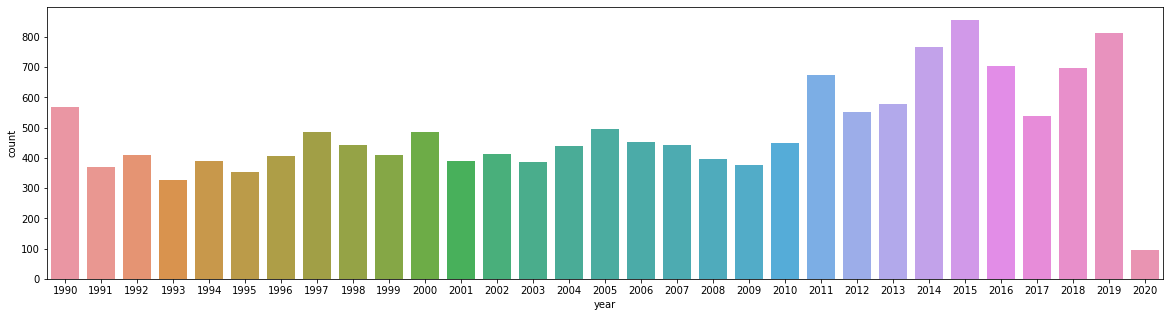

In [19]:
plt.figure(figsize = (20,5))
sns.countplot(data.year)

<AxesSubplot:xlabel='region', ylabel='count'>

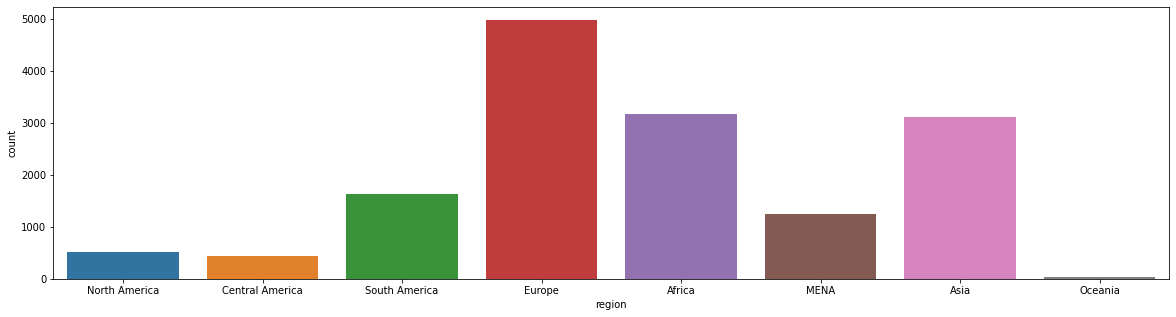

In [20]:
plt.figure(figsize = (20,5))

sns.countplot(data.region)

<AxesSubplot:ylabel='protestnumber'>

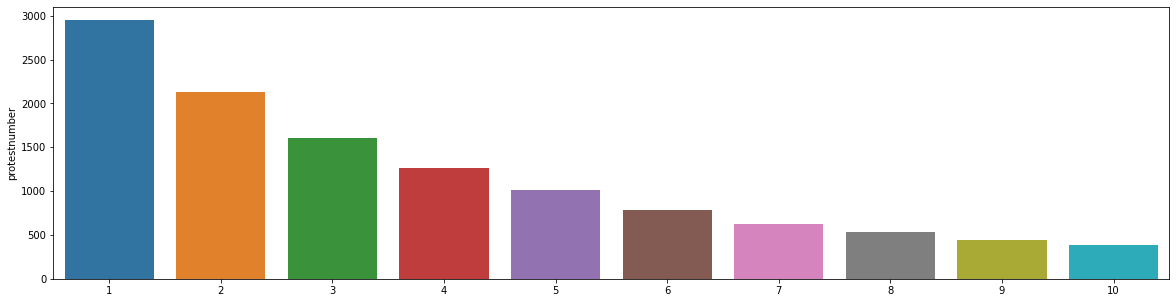

In [21]:
plt.figure(figsize = (20,5))

sns.barplot(x = data.protestnumber.value_counts()[:10].index, y =data.protestnumber.value_counts()[:10] )

<AxesSubplot:xlabel='protestnumber'>

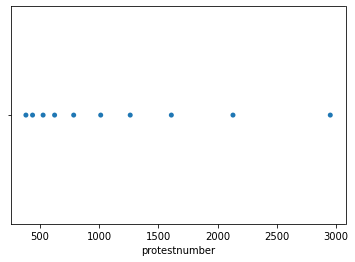

In [22]:
sns.swarmplot(x = data.protestnumber.value_counts()[:10])

c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='protesterviolence', ylabel='count'>

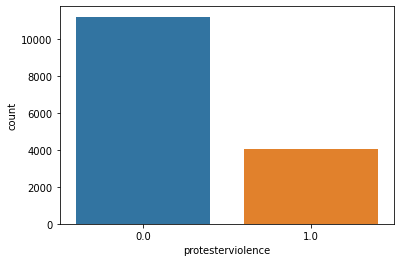

In [37]:
sns.countplot(data.protesterviolence)

<AxesSubplot:ylabel='location'>

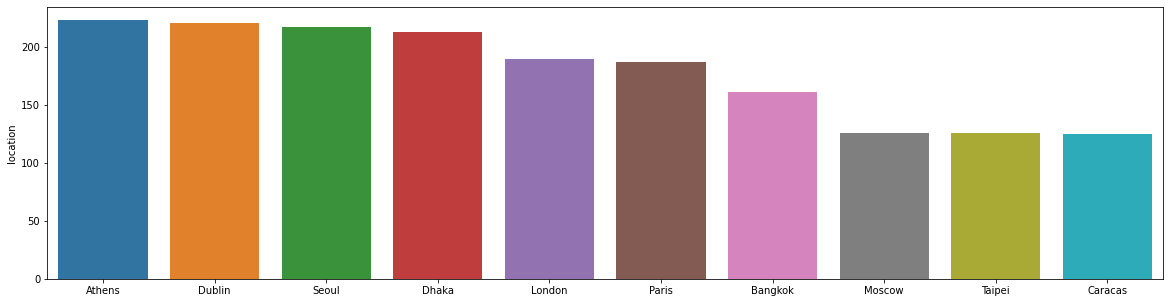

In [23]:
plt.figure(figsize = (20,5))

sns.barplot(x = data.location.value_counts()[1:11].index, y =data.location.value_counts()[1:11] )

<AxesSubplot:xlabel='participants_category', ylabel='count'>

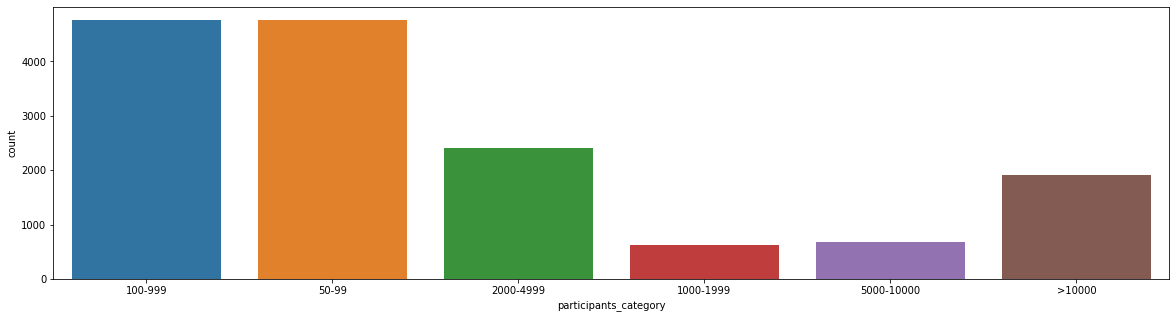

In [24]:
plt.figure(figsize = (20,5))

sns.countplot(data.participants_category)

Text(0.5, 1.0, 'Top 10 countries with most protests')

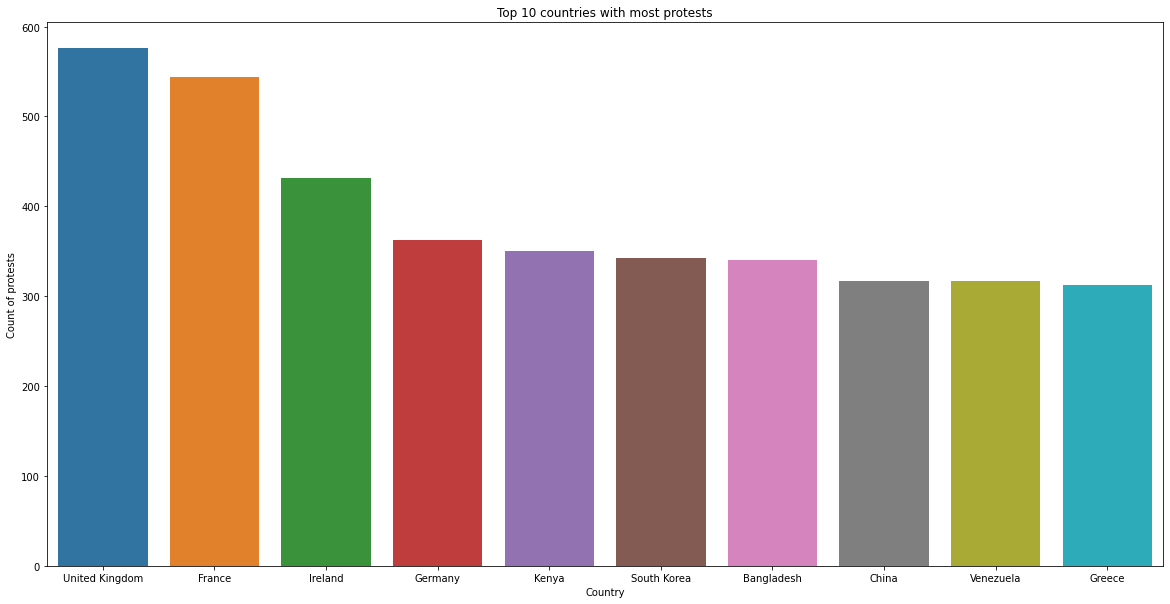

In [25]:
plt.figure(figsize = (20,10))

sns.barplot(x = data.country.value_counts().head(10).index, y =data.country.value_counts().head(10))
plt.ylabel("Count of protests")
plt.xlabel("Country")
plt.title("Top 10 countries with most protests")

<AxesSubplot:ylabel='protesteridentity'>

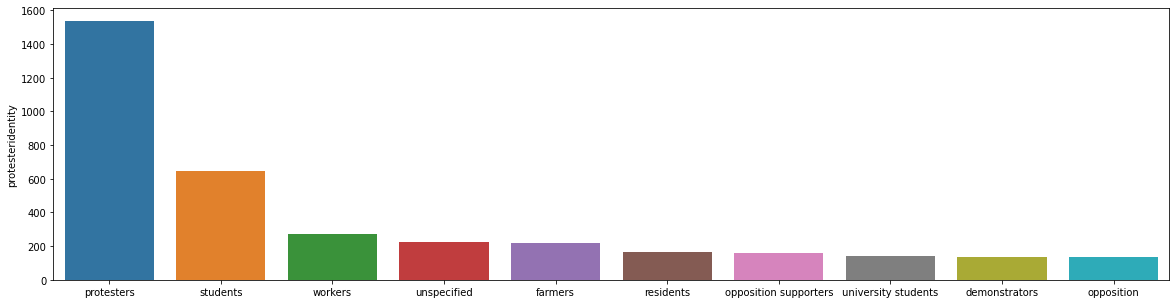

In [26]:
data.protesteridentity.value_counts()

plt.figure(figsize = (20,5))

sns.barplot(x = data.protesteridentity.value_counts()[:10].index, y =data.protesteridentity.value_counts()[:10] )

<AxesSubplot:>

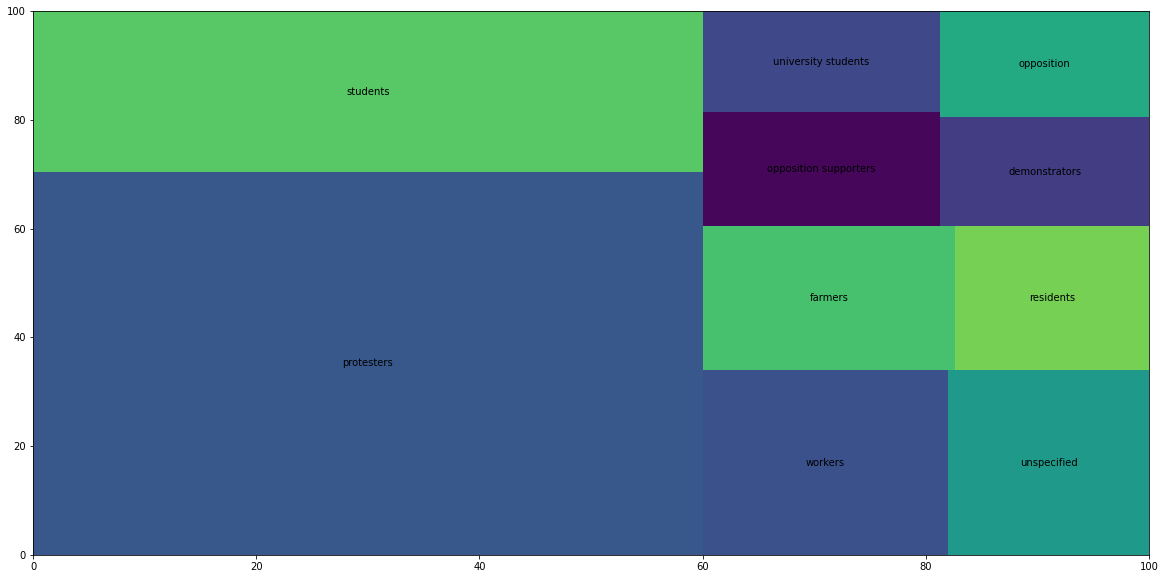

In [27]:
plt.figure(figsize = (20,10))

sq.plot(sizes = data.protesteridentity.value_counts()[:10], label = data.protesteridentity.value_counts()[:10].index)

<AxesSubplot:ylabel='protesterdemand1'>

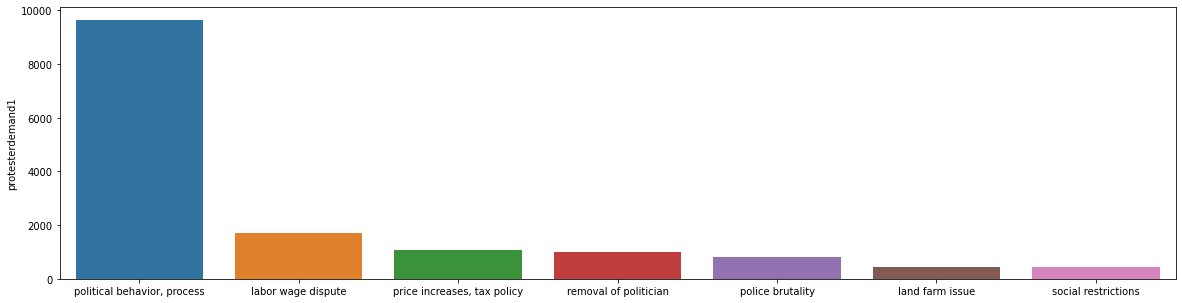

In [28]:
plt.figure(figsize = (20,5))

sns.barplot(x = data.protesterdemand1.value_counts()[:10].index, y =data.protesterdemand1.value_counts()[:10] )

<AxesSubplot:>

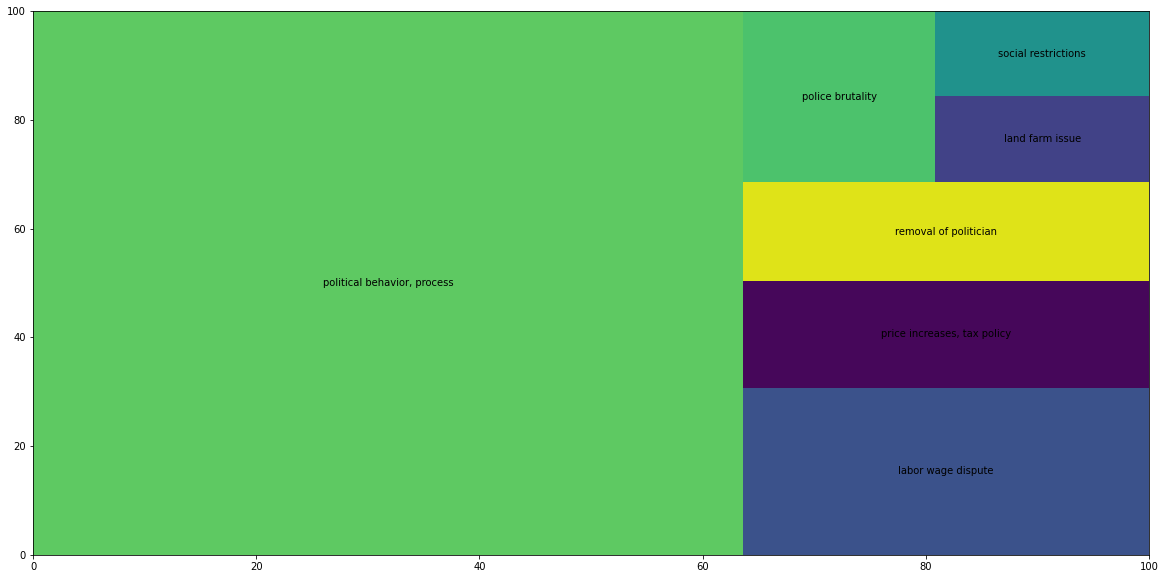

In [29]:
plt.figure(figsize = (20,10))

sq.plot(sizes = data.protesterdemand1.value_counts()[:10], label = data.protesterdemand1.value_counts()[:10].index)

<AxesSubplot:ylabel='stateresponse1'>

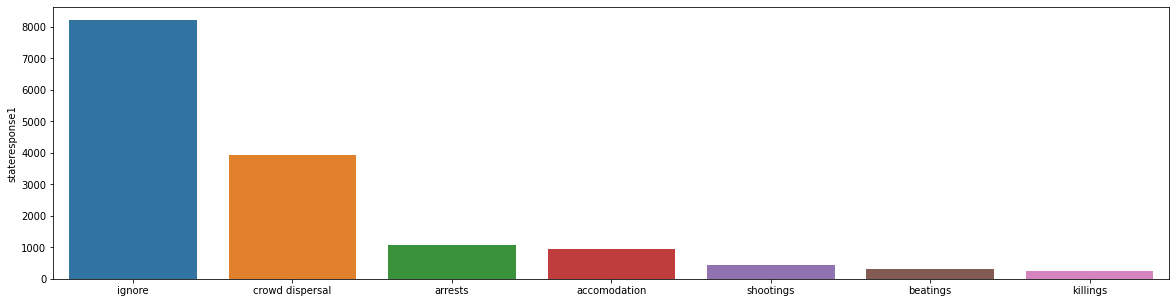

In [30]:
plt.figure(figsize = (20,5))

sns.barplot(x = data.stateresponse1.value_counts()[:10].index, y =data.stateresponse1.value_counts()[:10] )

<AxesSubplot:>

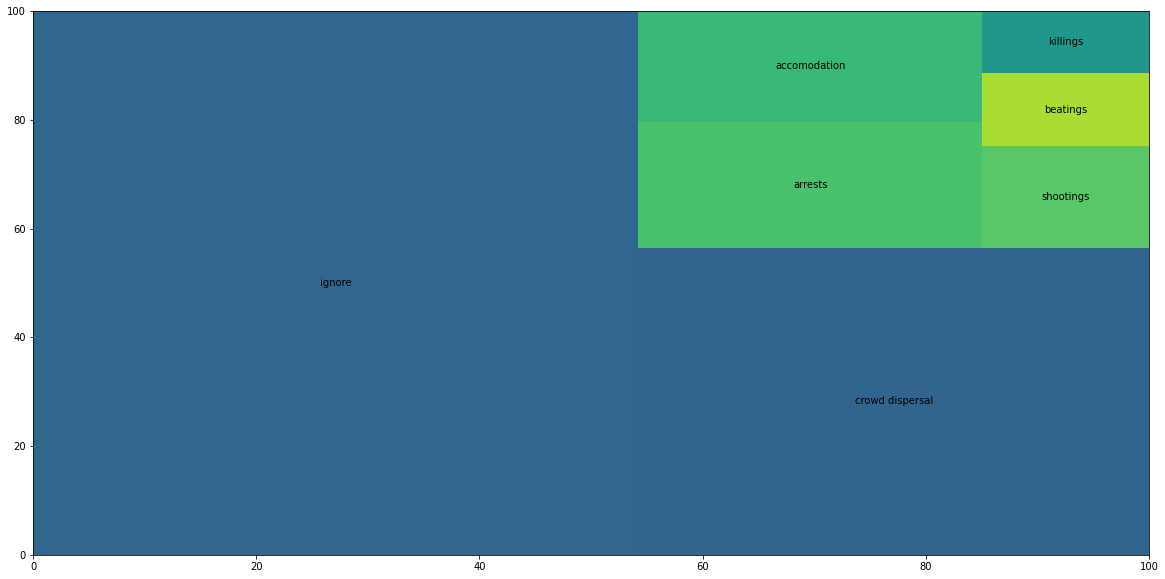

In [31]:
plt.figure(figsize = (20,10))

sq.plot(sizes = data.stateresponse1.value_counts()[:10], label = data.stateresponse1.value_counts()[:10].index)

In [60]:
data.sources

0        1. great canadian train journeys into history;...
1        1. autonomy s cry revived in quebec the new yo...
2        1. quebec protest after queen calls for unity ...
3        1. indians gather as siege intensifies; armed ...
4        1. dozens hurt in mohawk blockade protest the ...
                               ...                        
17136    probe into killing of manus detainee; manus is...
17138    papua new guinea: reports of up to four people...
17139    bougainville imposes moratorium on panguna min...
17140    violence, chaos and fraud: fraught papua new g...
17141    refugees dig in as camp closes; manus situatio...
Name: sources, Length: 15239, dtype: object

<AxesSubplot:ylabel='sources'>

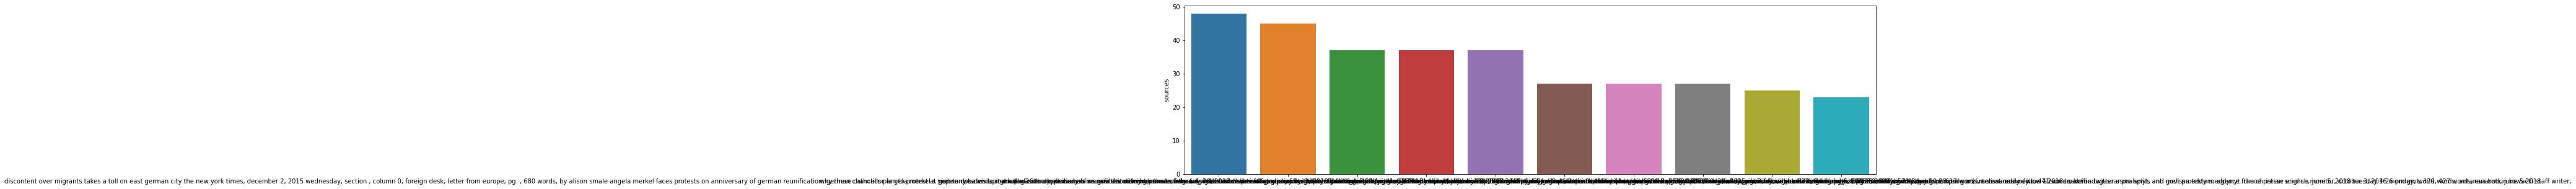

In [32]:
plt.figure(figsize = (20,5))

sns.barplot(x = data.sources.value_counts()[:10].index, y =data.sources.value_counts()[:10] )

<AxesSubplot:xlabel='protestduration'>

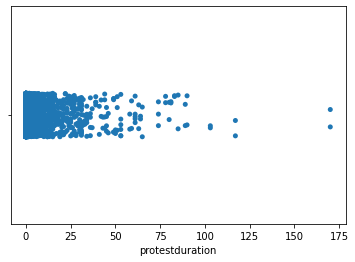

In [34]:
sns.stripplot(data["protestduration"])

<AxesSubplot:xlabel='protestduration'>

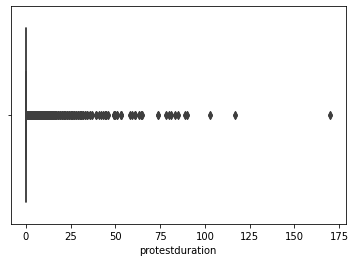

In [35]:
sns.boxplot(data["protestduration"])

In [38]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'startdate', 'enddate', 'protestduration(days)'],
      dtype='object')

In [128]:
data.groupby("country").protesterviolence.mean().reset_index()

,country,protesterviolence
0,Afghanistan,0.205128
1,Albania,0.397436
2,Algeria,0.219048
3,Angola,0.125000
4,Argentina,0.243478
...,...,...
161,Vietnam,0.526316
162,Yemen,0.203822
163,Yugoslavia,0.248175
164,Zambia,0.410526


# Multivariate Analysis

<AxesSubplot:>

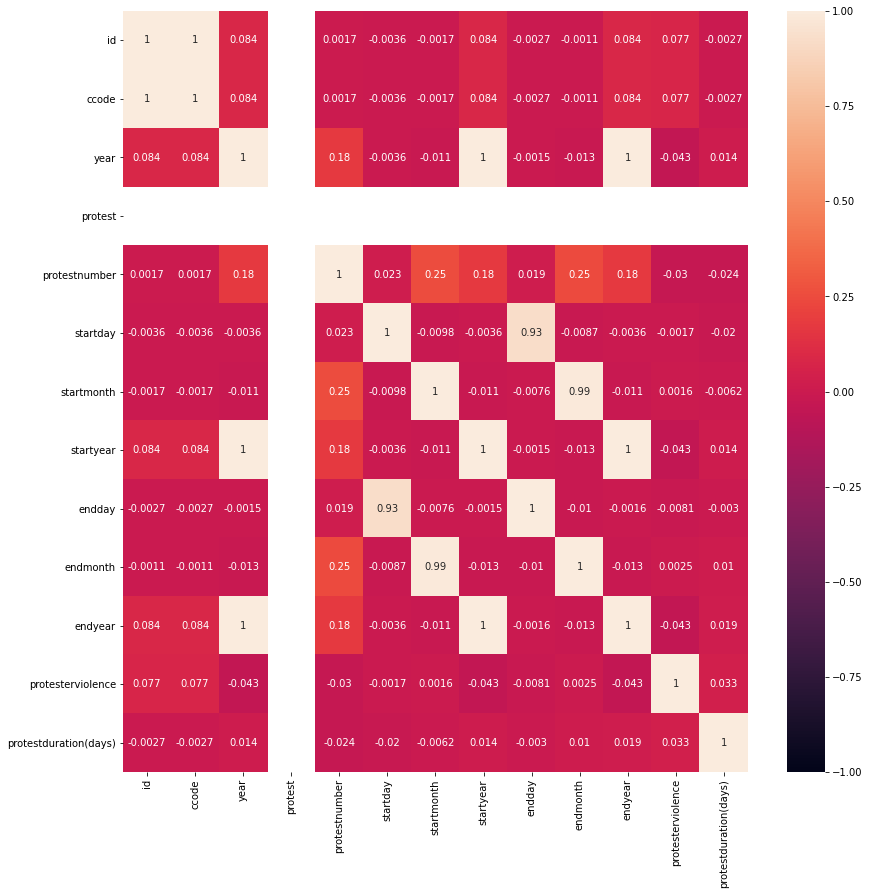

In [78]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), vmin =-1,vmax= 1,annot = True)

In [29]:

fig = px.choropleth(data.groupby("country").protesterdemand1.describe().top.reset_index(), locationmode = 'country names', locations="country", color="top",
                           color_continuous_scale="Mint",
#                            range_color=(0, 1),
                           scope="world",
                    title = "Most frequent protesters' demands across various countries",
#                            labels={data["country"].to_list():data["protesterviolence"].to_list()}
                          )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [25]:

fig = px.choropleth(data.groupby("country").stateresponse1.describe().top.reset_index(), locationmode = 'country names', locations="country", color="top",
#                            color_continuous_scale="Mint",
#                            range_color=(0, 1),
                           scope="world",
                    title = "Most frequent response to protests by the various countries",
#                            labels={data["country"].to_list():data["protesterviolence"].to_list()}
                          )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

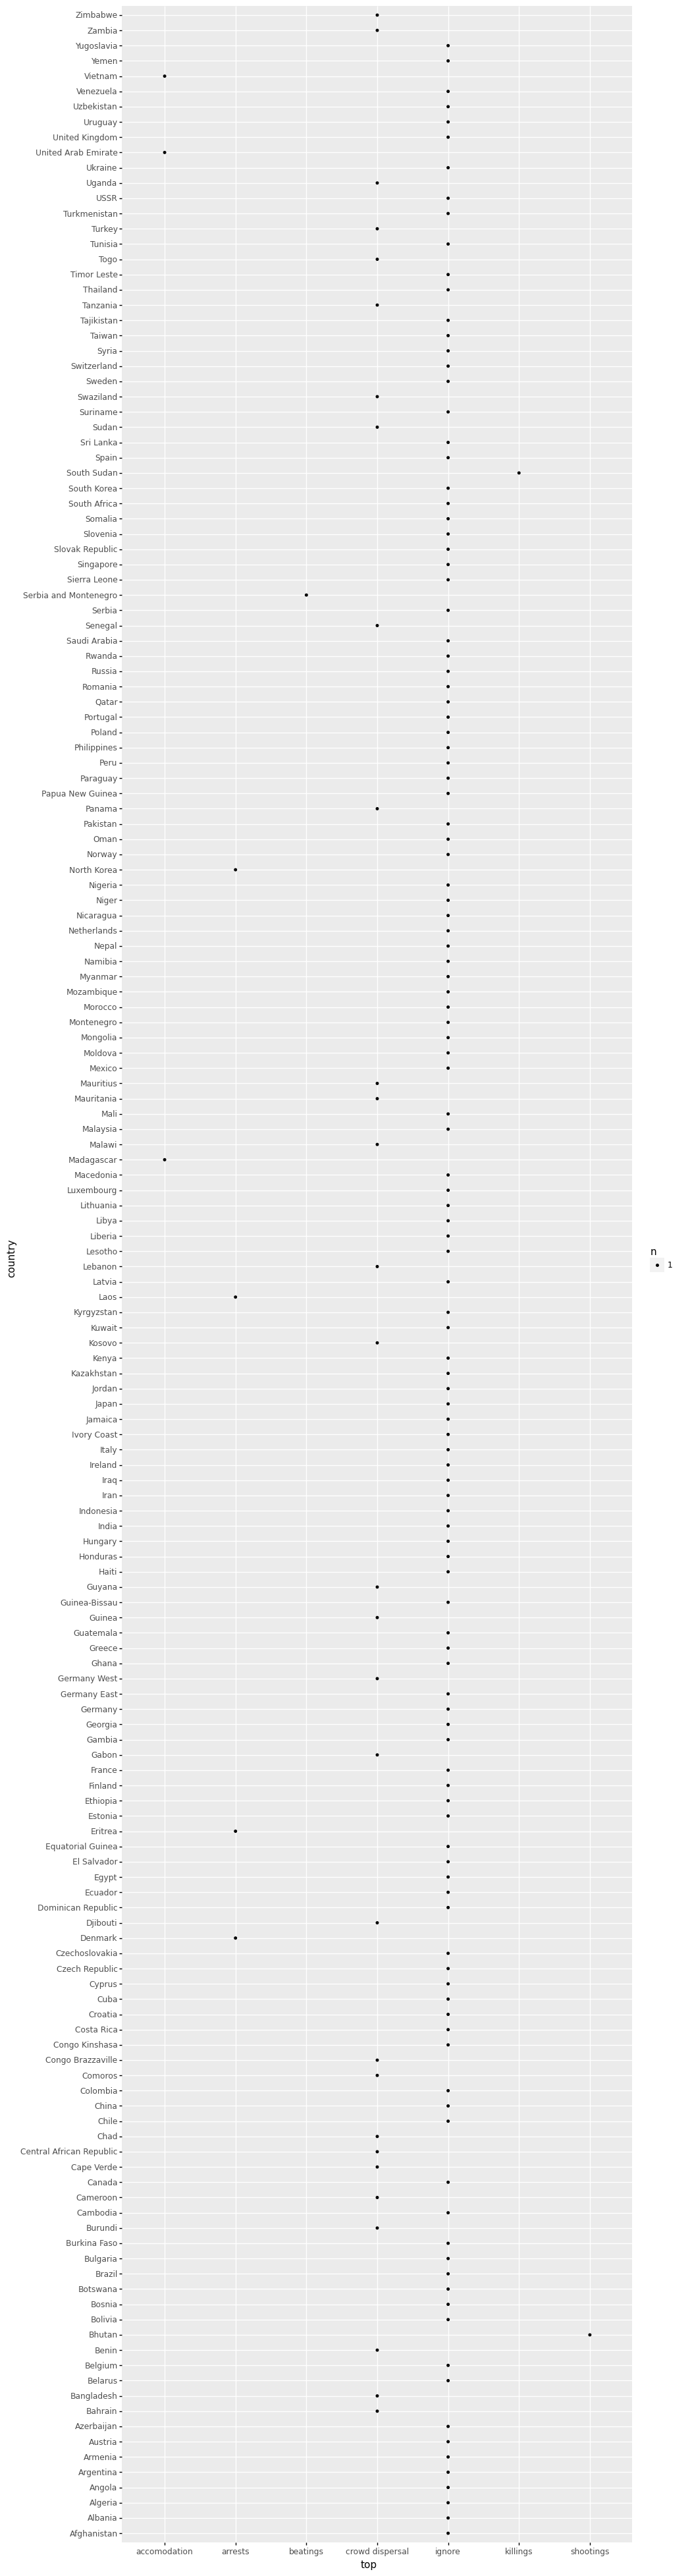

<ggplot: (146702430266)>

In [107]:
ggplot(data.groupby("country").stateresponse1.describe().top.reset_index(), \
       aes(y = 'country',x   = 'top')) + geom_count(shape = 'o') + scale_size_area(max_size = 1) +  theme(figure_size = (10, 50))


In [37]:
fig = px.choropleth(data.groupby("country")['protestduration'].mean().reset_index(), locationmode = 'country names', locations="country", color="protestduration",
                           color_continuous_scale="Mint",
#                            range_color=(0, 1),
                           scope="world",
                    title = "Average protest duration in days",
#                            labels={data["country"].to_list():data["protesterviolence"].to_list()}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [38]:
data.groupby("country")['protestduration'].mean().sort_values(ascending = False).head(10)

country
Vietnam     19.500000
Canada       6.725490
Suriname     5.313725
Qatar        5.000000
Bolivia      4.532374
Tunisia      4.069767
Syria        3.687500
Morocco      3.641026
Guyana       3.600000
Colombia     3.485507
Name: protestduration, dtype: float64

In [30]:
fig = px.choropleth(data.groupby("country").protesterviolence.mean().reset_index(), locationmode = 'country names', locations="country", color="protesterviolence",
                           color_continuous_scale="Reds",
                           range_color=(0, 1),
                           scope="world",
#                            labels={data["country"].to_list():data["protesterviolence"].to_list()}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

__Countries with most violent protests__

In [129]:
data.groupby("country").protesterviolence.mean().sort_values(ascending = False).head(10)

country
United Arab Emirate    0.666667
Guinea                 0.666667
Gabon                  0.657143
Comoros                0.625000
Congo Brazzaville      0.600000
Djibouti               0.600000
Chad                   0.588235
Denmark                0.545455
Haiti                  0.528455
Vietnam                0.526316
Name: protesterviolence, dtype: float64

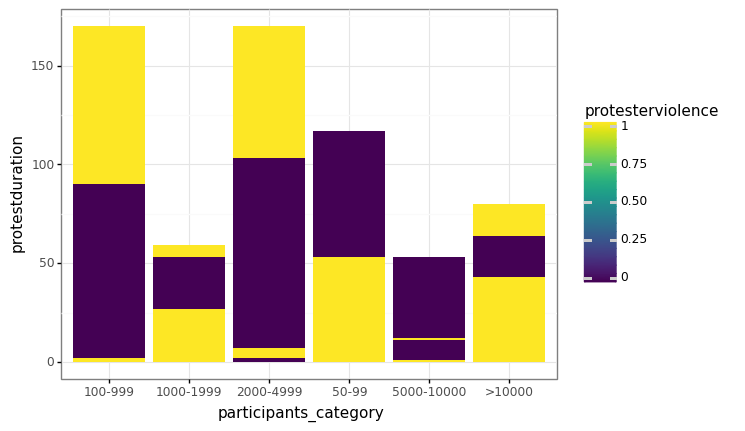

<ggplot: (88056140993)>

In [39]:
ggplot(data,aes(fill='protesterviolence',y = 'protestduration',x   = 'participants_category')) + geom_col(position = "dodge") + theme_bw()

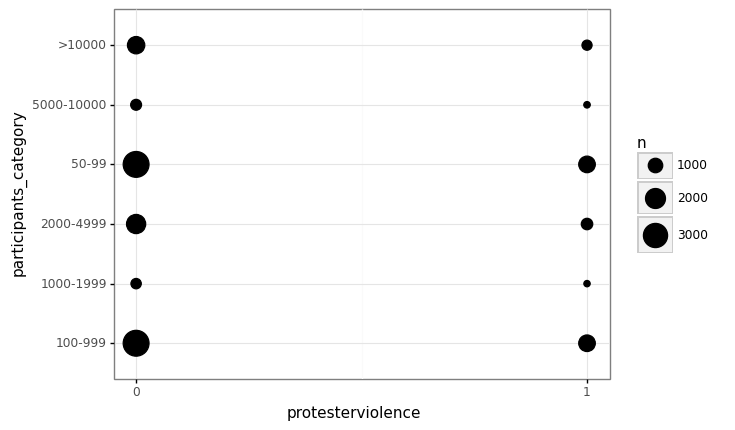

<ggplot: (146703976376)>

In [71]:
ggplot(data,aes(x = 'protesterviolence',y   = 'participants_category')) + geom_count(shape = 'o') + scale_x_continuous(breaks = (0,1)) + scale_size_area(max_size = 10) +  theme_bw()

It looks like 50-99 and 100-999 participants category turned out be to most violent, while 1000-1999 and 5000-10000 turned out to be least violent

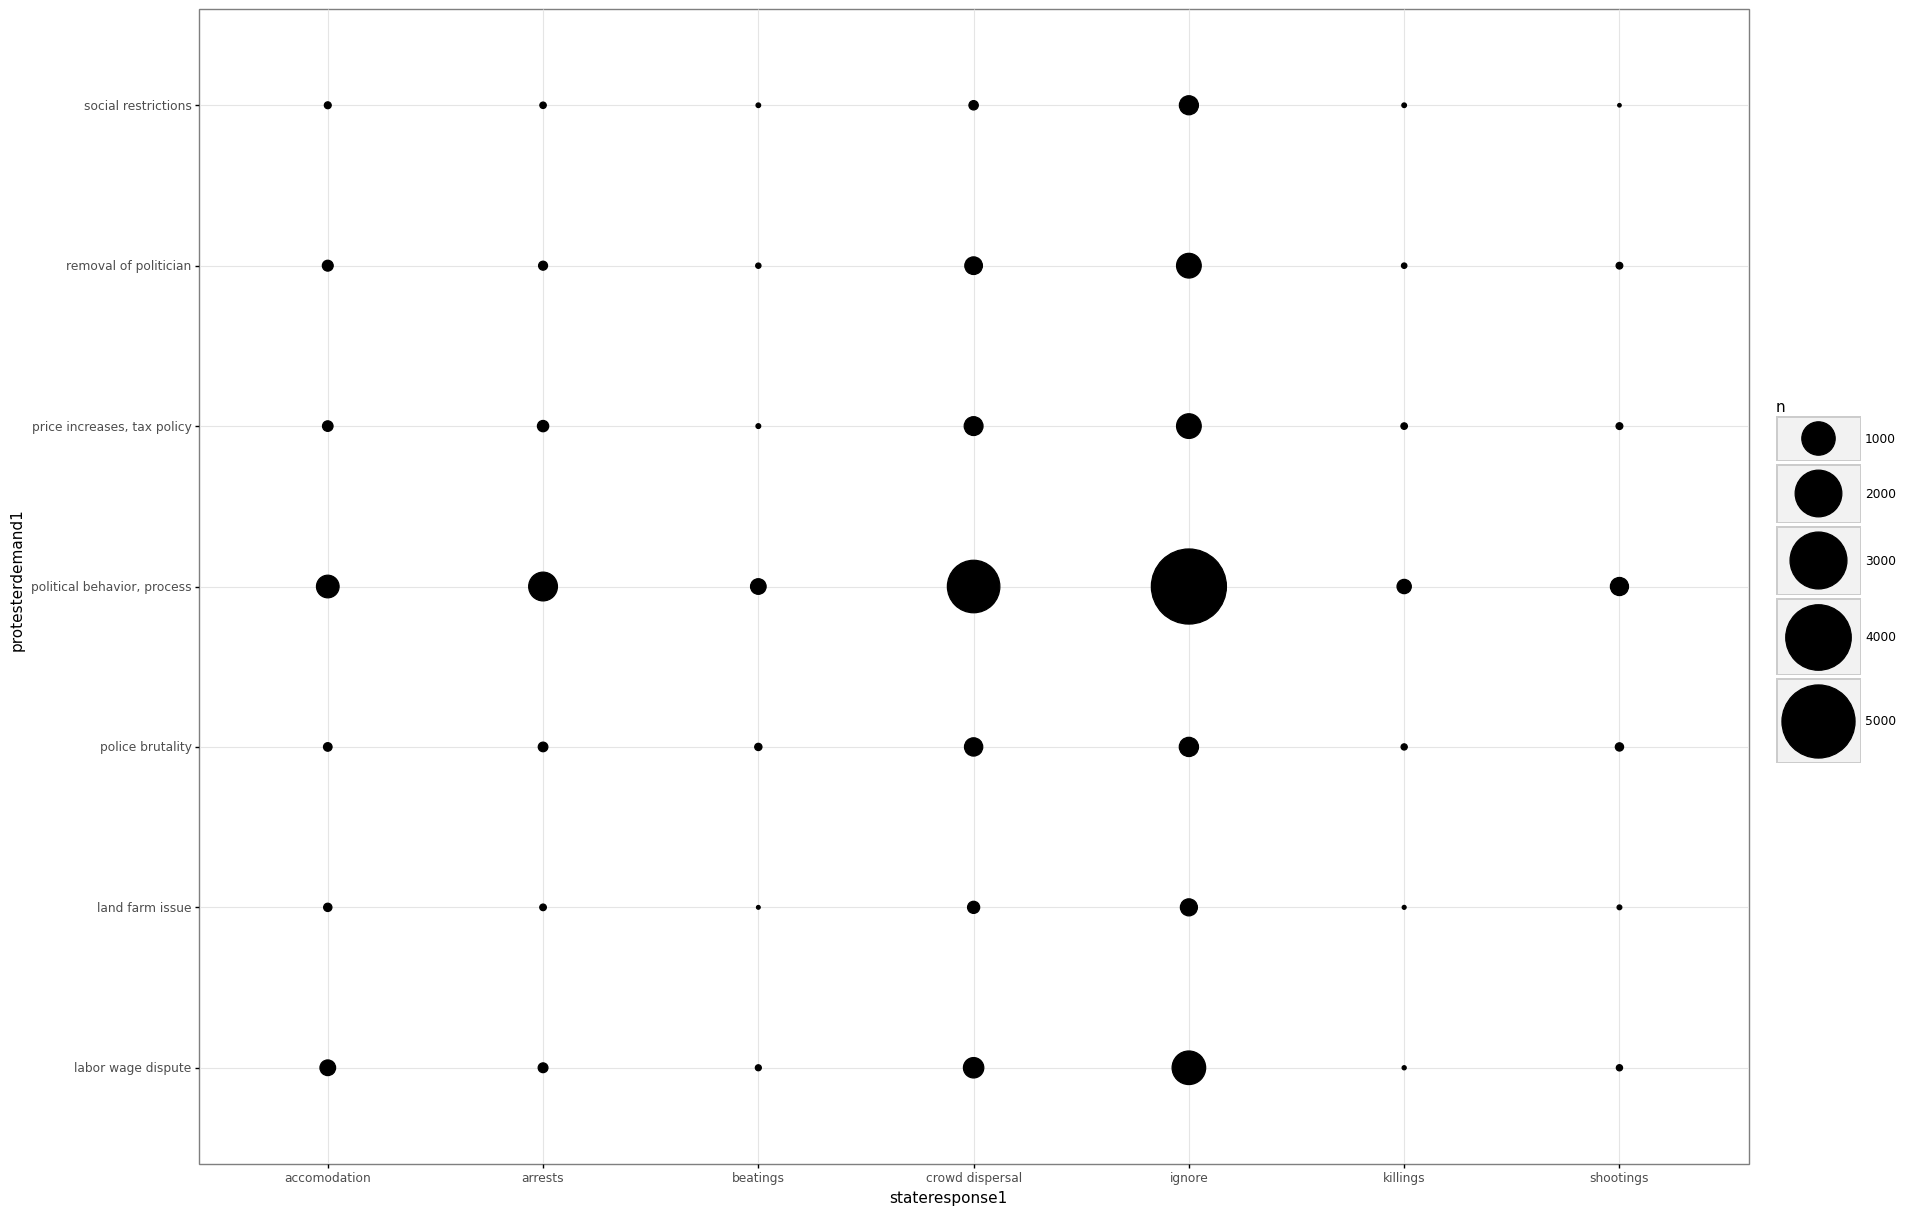

<ggplot: (88052153850)>

In [18]:
ggplot(data,aes(y = 'protesterdemand1',x   = 'stateresponse1')) + geom_count(shape = 'o') + scale_size_area(max_size = 30)  + theme_bw()  +  theme(figure_size = (20,15))

<AxesSubplot:xlabel='protestduration', ylabel='Density'>

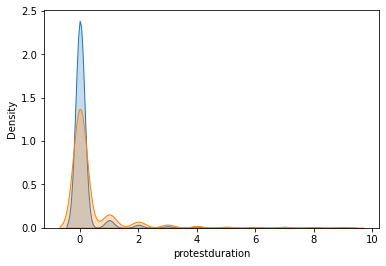

In [40]:
sns.kdeplot(data.loc[(data['protestduration'] < 10) & (data.protesterviolence == 0),"protestduration"],fill = 'blue')
sns.kdeplot(data.loc[(data['protestduration'] < 10) & (data.protesterviolence == 1),"protestduration"],fill = 'red')


In [126]:
help(geom_count)

Help on class geom_count in module plotnine.geoms.geom_count:

class geom_count(plotnine.geoms.geom_point.geom_point)
 |  geom_count(mapping=None, data=None, **kwargs)
 |  
 |  Plot overlapping points
 |  
 |  This is a variant :class:`geom_point` that counts the number
 |  of observations at each location, then maps the count to point
 |  area. It useful when you have discrete data and overplotting.
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_count(mapping=None, data=None, stat='sum', position='identity',
 |                 na_rm=False, inherit_aes=True, show_legend=None, raster=False,
 |                 **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combin

Top 10 countries with Highest rate of protester violence

In [18]:
help(geom_col)

Help on class geom_col in module plotnine.geoms.geom_col:

class geom_col(plotnine.geoms.geom_bar.geom_bar)
 |  geom_col(mapping=None, data=None, **kwargs)
 |  
 |  Bar plot with base on the x-axis
 |  
 |  This is an alternate version of :class:`geom_bar` that maps
 |  the height of bars to an existing variable in your data. If
 |  you want the height of the bar to represent a count of cases,
 |  use :class:`geom_bar`.
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_col(mapping=None, data=None, stat='identity', position='stack',
 |               na_rm=False, inherit_aes=True, show_legend=None, raster=False,
 |               width=None, **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inh

# Time Series Analysis

In [15]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'startdate', 'enddate', 'protestduration(days)'],
      dtype='object')

In [31]:
pd.to_datetime(data_cleaned.startdate)

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-07-12
4       1990-08-14
           ...    
15203   2014-02-16
15204   2016-05-15
15205   2017-06-15
15206   2017-07-15
15207   2017-10-31
Name: startdate, Length: 15208, dtype: datetime64[ns]

<AxesSubplot:xlabel='startdate', ylabel='protesterviolence'>

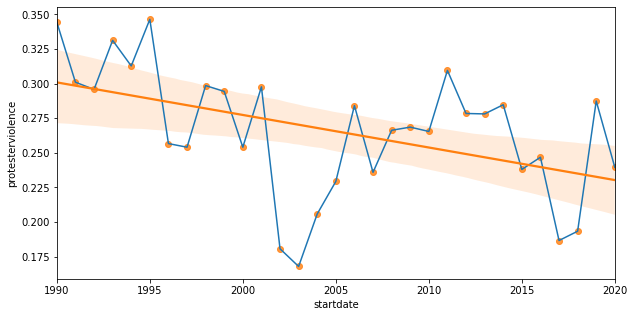

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(y = data.groupby(data.startdate.dt.year).protesterviolence.mean(), x = data.groupby(data.startdate.dt.year).protesterviolence.mean().index, markers=True)
sns.regplot(y = data.groupby(data.startdate.dt.year).protesterviolence.mean(), x = data.groupby(data.startdate.dt.year).protesterviolence.mean().index)

__This suggests that violent protests have been occuring less and less over the years__

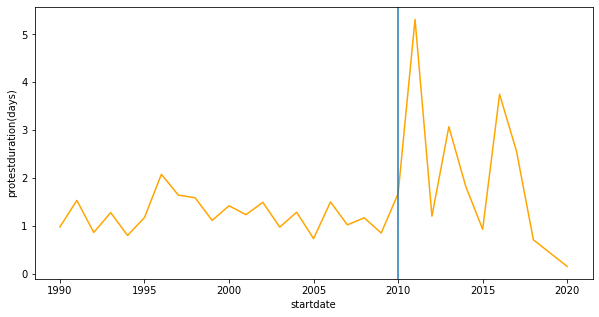

In [105]:
plt.figure(figsize=(10,5))
sns.lineplot(y = data.groupby(data.startdate.dt.year)['protestduration(days)'].mean(), x = data.groupby(data.startdate.dt.year)['protestduration(days)'].mean().index, markers=True,color = 'orange')
plt.axvline(2010, 0,2020)

__Protests from 2010 have lasted way longer than protests that started before 2010__

# Predicting if a protest will turn violent or not

In [67]:
data.protesterviolence.value_counts()

0    11153
1     4001
Name: protesterviolence, dtype: int64

# Feature Selection

In [26]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'startdate', 'enddate', 'protestduration(days)'],
      dtype='object')

In [32]:
data["participants_category_encoded"] = data.participants_category.replace(category_mapping)

In [33]:
protesterdemand_encoder = OneHotEncoder(handle_unknown ='ignore',sparse = False)
protesterdemand_encoder.fit(np.array(data.protesterdemand1).reshape(-1,1))
encoded_protester_demand_df = pd.DataFrame(protesterdemand_encoder.transform(np.array(data.protesterdemand1).reshape(-1,1)),columns =protesterdemand_encoder.categories_ )

In [34]:
stateresponse_encoder = OneHotEncoder(handle_unknown ='ignore',sparse = False)
stateresponse_encoder.fit(np.array(data.stateresponse1).reshape(-1,1))
encoded_state_response_df = pd.DataFrame(stateresponse_encoder.transform(np.array(data.stateresponse1).reshape(-1,1)),columns =stateresponse_encoder.categories_ )

In [245]:
features = ['protestnumber','year','ccode','participants_category_encoded','protestduration']

In [246]:
pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1)

,protestnumber,year,ccode,participants_category_encoded,protestduration,"(labor wage dispute,)","(land farm issue,)","(police brutality,)","(political behavior, process,)","(price increases, tax policy,)","(removal of politician,)","(social restrictions,)","(accomodation,)","(arrests,)","(beatings,)","(crowd dispersal,)","(ignore,)","(killings,)","(shootings,)"
0,1,1990,20,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1990,20,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1990,20,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,1990,20,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,1990,20,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,1,2014,910,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15106,1,2016,910,3,25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15107,1,2017,910,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15108,2,2017,910,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Variance Threshold

In [247]:
thresholder = VarianceThreshold(threshold = 0.2)
features_high_variance = thresholder.fit_transform(MinMaxScaler(feature_range=(0, 1)).fit_transform(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1)))
print([ float('{:f}'.format(var)) for var in thresholder.variances_])
print(list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns))

[0.007503, 0.08917, 0.06909, 0.118004, 0.005403, 0.09908, 0.029206, 0.051206, 0.231413, 0.066424, 0.061916, 0.029144, 0.058514, 0.066083, 0.019587, 0.191744, 0.248183, 0.016911, 0.027211]
['protestnumber', 'year', 'ccode', 'participants_category_encoded', 'protestduration', ('labor wage dispute',), ('land farm issue',), ('police brutality',), ('political behavior, process',), ('price increases, tax policy',), ('removal of politician',), ('social restrictions',), ('accomodation',), ('arrests',), ('beatings',), ('crowd dispersal',), ('ignore',), ('killings',), ('shootings',)]


## Correlation Heatmap

<AxesSubplot:>

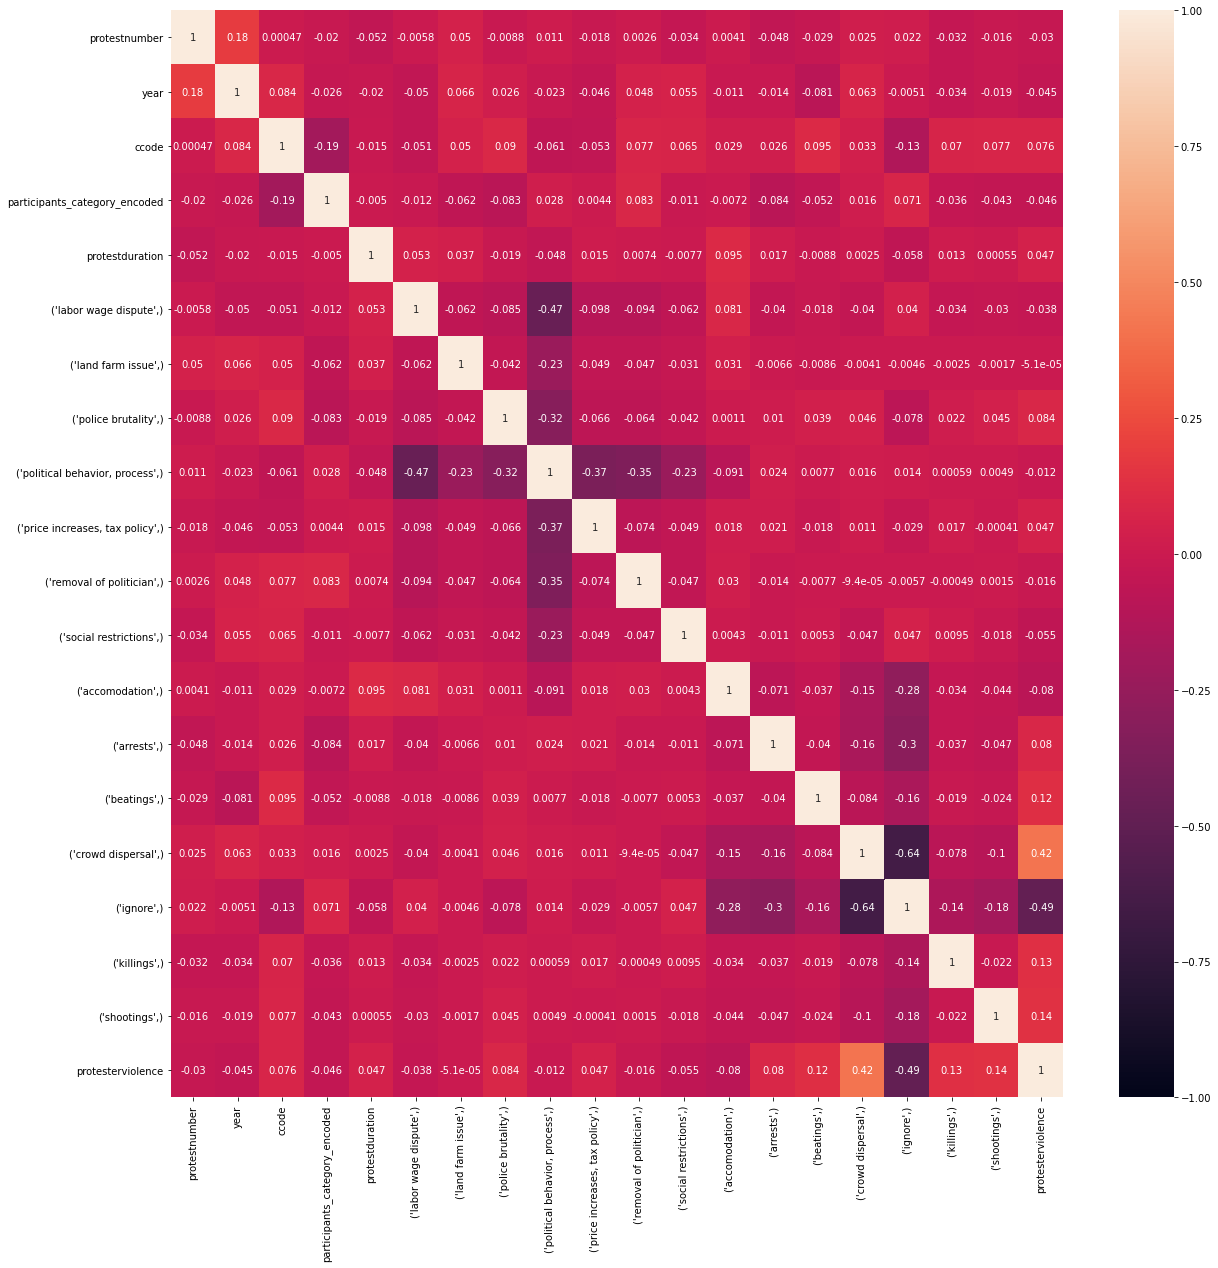

In [248]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df,data.protesterviolence],axis = 1).corr(), vmin= -1, vmax = 1, annot = True)

## ANOVA F-test

In [249]:
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.protesterviolence)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(10)

,0,1
16,"(ignore,)",4649.897484
15,"(crowd dispersal,)",3249.192912
18,"(shootings,)",280.783922
17,"(killings,)",258.845400
14,"(beatings,)",230.747403
7,"(police brutality,)",108.346580
12,"(accomodation,)",97.243984
13,"(arrests,)",96.447241
2,ccode,88.362968
11,"(social restrictions,)",46.234857


# Chai Square Test

In [250]:
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.protesterviolence)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(10)

,0,1
2,ccode,11142.960439
15,"(crowd dispersal,)",1982.735551
16,"(ignore,)",1626.460586
4,protestduration,593.741198
18,"(shootings,)",267.979165
17,"(killings,)",250.139446
0,protestnumber,248.583885
14,"(beatings,)",222.763141
7,"(police brutality,)",101.764856
12,"(accomodation,)",90.603974


## Mutual Information

In [251]:
test = SelectKBest(score_func=mutual_info_classif, k=7)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.protesterviolence)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(10)

,0,1
16,"(ignore,)",0.128396
15,"(crowd dispersal,)",0.088669
2,ccode,0.047678
4,protestduration,0.010063
12,"(accomodation,)",0.009618
9,"(price increases, tax policy,)",0.009150
13,"(arrests,)",0.008405
18,"(shootings,)",0.006541
1,year,0.006174
0,protestnumber,0.005698


## Random Forest Feature Importance

In [252]:
rf = RandomForestClassifier()

fit = rf.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.protesterviolence)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.feature_importances_ )).sort_values(by=1,ascending = False).head(10)

,0,1
2,ccode,0.220591
1,year,0.175915
0,protestnumber,0.166772
16,"(ignore,)",0.129453
15,"(crowd dispersal,)",0.096756
3,participants_category_encoded,0.058429
4,protestduration,0.038662
12,"(accomodation,)",0.022919
18,"(shootings,)",0.013132
17,"(killings,)",0.011303


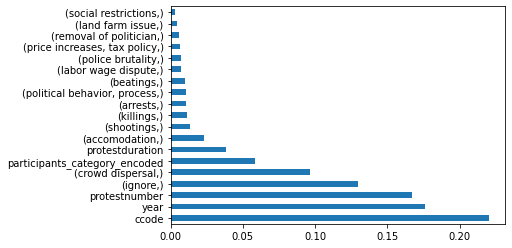

In [253]:
feat_importances = pd.Series(rf.feature_importances_, index=pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

### Recursive Feature Elimination on Logistic Regression

In [254]:
classification = LogisticRegression()
rfe = RFE(classification,7)
fit = rfe.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.loc[:,"protesterviolence"])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(dict(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.support_ )))


Num Features: 7
Selected Features: [False False False False False False False False False False False  True
  True False  True  True  True  True  True]
Feature Ranking: [11 12 13  9  8  6 10  2  5  3  4  1  1  7  1  1  1  1  1]
{'protestnumber': False, 'year': False, 'ccode': False, 'participants_category_encoded': False, 'protestduration': False, ('labor wage dispute',): False, ('land farm issue',): False, ('police brutality',): False, ('political behavior, process',): False, ('price increases, tax policy',): False, ('removal of politician',): False, ('social restrictions',): True, ('accomodation',): True, ('arrests',): False, ('beatings',): True, ('crowd dispersal',): True, ('ignore',): True, ('killings',): True, ('shootings',): True}


In [300]:
X

,protestnumber,year,ccode,participants_category_encoded,protestduration,"(labor wage dispute,)","(land farm issue,)","(police brutality,)","(political behavior, process,)","(price increases, tax policy,)","(removal of politician,)","(social restrictions,)","(accomodation,)","(arrests,)","(beatings,)","(crowd dispersal,)","(ignore,)","(killings,)","(shootings,)"
0,1,1990,20,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1990,20,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1990,20,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,1990,20,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,1990,20,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,1,2014,910,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15106,1,2016,910,3,25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15107,1,2017,910,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15108,2,2017,910,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Training models

In [302]:
rf_features = ['ccode','protestnumber','participants_category_encoded','crowddispersal','ignore','protestduration','accomodation','year']
rfe_features = ['ignore','accomodation','killings','shootings','beatings','crowddispersal','socialrestrictions']
anova_features = ['ignore','crowddispersal','killings','shootings']
chi_2_features = ['ignore','crowddispersal','ccode','protestduration']
mi_features = ['ignore','crowddispersal','ccode','protestduration','accomodation','arrests']
corr_features = ['ignore','killings','shootings','beatings','crowddispersal']
self_features = ['ccode','ignore','participants_category_encoded']

In [303]:
X = pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1)
y = pd.DataFrame(data.protesterviolence)

In [304]:
X.columns = [i for i in list(X.columns) if type(i) == str] + [str(i).strip('(').strip(')').strip("'").strip(',').strip("'") for i in list(X.columns) if type(i) == tuple]
y.columns = ['protesterviolence']

In [305]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y = y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [306]:
X = X[self_features]

In [111]:
# scores = []
# lgbmr = LGBMRegressor()
# cv = KFold(n_splits=10, random_state=32, shuffle=False)
# for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
#     X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
#     lgbmr.fit(X_train, y_train)
#     print("Score: ",lgbmr.score(X_test, y_test))
#     scores.append(lgbmr.score(X_test, y_test))
    
# print(np.mean(scores))

## Pipeline

In [307]:
def f1_cross_validation_score(model):
    pipeline = make_pipeline(model)
    skf = StratifiedKFold(n_splits=5, random_state=31, shuffle=True)
    cv_results = cross_val_score(pipeline,X,y,cv=skf,scoring='f1',n_jobs=-1) 
    return np.mean(cv_results)

### Random Forest

__Without Feature Selection__

In [92]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.5444392626283714

__Feature selection based on Random Forest Feature Importance__

In [107]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.5443650835270972

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [261]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.649406698535872

__Feature selection based on ANOVA F-test Scores__

In [283]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6293730258299244

__Feature selection based on Chi Square Test scores__

In [137]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.4312277417851439

__Feature selection based on Mutual Information scores__

In [271]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6314293991363218

__Feature selection based on Pearson Correlation scores__

In [293]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6516310624925327

__Feature selection based on self chosen features__

In [308]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.5712468460326822

### LightGBM Classifier

__Without Feature Selection__

In [93]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.5611620205122136

__Feature selection based on Random Forest Feature Importance__

In [108]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.5649520795701664

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [262]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.649406698535872

__Feature selection based on ANOVA F-test Scores__

In [284]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6293730258299244

__Feature selection based on Chi Square Test scores__

In [138]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.46848798813116266

__Feature selection based on Mutual Information scores__

In [272]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6504353924390772

__Feature selection based on Pearson Correlation scores__

In [294]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6516310624925327

__Feature selection based on self chosen features__

### XGB Classifier

__Without Feature Selection__

In [94]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.5526395463085763

__Feature selection based on Random Forest Feature Importance__

In [109]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.5497355559253605

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [273]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.64358444542042

__Feature selection based on ANOVA F-test Scores__

In [285]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6293730258299244

__Feature selection based on Chi Square Test scores__

In [139]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.47728559319637337

__Feature selection based on Mutual Information scores__

In [274]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.64358444542042

__Feature selection based on Pearson Correlation scores__

In [295]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6516310624925327

__Feature selection based on self chosen features__

### CatBoost Classifier

__Without Feature Selection__

In [95]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.5649094272960318

__Feature selection based on Random Forest Feature Importance__

In [110]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.5570082642589694

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [264]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6494808175959181

__Feature selection based on ANOVA F-test Scores__

In [286]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6293730258299244

__Feature selection based on Chi Square Test scores__

In [140]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.4591238471651825

__Feature selection based on Mutual Information scores__

In [275]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6518547408968111

__Feature selection based on Pearson Correlation scores__

In [296]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6516310624925327

__Feature selection based on self chosen features__

In [405]:
X_train,X_test, y_train,y_test = train_test_split(X,y)

In [406]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Predicting protest duration

# Feature Selection

In [35]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'startdate', 'enddate', 'protestduration'],
      dtype='object')

In [36]:
data["participants_category_encoded"] = data.participants_category.replace(category_mapping)

In [37]:
protesterdemand_encoder = OneHotEncoder(handle_unknown ='ignore',sparse = False)
protesterdemand_encoder.fit(np.array(data.protesterdemand1).reshape(-1,1))
encoded_protester_demand_df = pd.DataFrame(protesterdemand_encoder.transform(np.array(data.protesterdemand1).reshape(-1,1)),columns =protesterdemand_encoder.categories_ )

In [38]:
stateresponse_encoder = OneHotEncoder(handle_unknown ='ignore',sparse = False)
stateresponse_encoder.fit(np.array(data.stateresponse1).reshape(-1,1))
encoded_state_response_df = pd.DataFrame(stateresponse_encoder.transform(np.array(data.stateresponse1).reshape(-1,1)),columns =stateresponse_encoder.categories_ )

In [39]:
features = ['protestnumber','year','ccode','protesterviolence','participants_category_encoded']

In [40]:
pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1)

,protestnumber,year,ccode,protesterviolence,participants_category_encoded,"(labor wage dispute,)","(land farm issue,)","(police brutality,)","(political behavior, process,)","(price increases, tax policy,)","(removal of politician,)","(social restrictions,)","(accomodation,)","(arrests,)","(beatings,)","(crowd dispersal,)","(ignore,)","(killings,)","(shootings,)"
0,1,1990,20,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1990,20,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1990,20,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,1990,20,1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,1990,20,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,1,2014,910,1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15106,1,2016,910,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15107,1,2017,910,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15108,2,2017,910,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Variance Threshold

In [41]:
thresholder = VarianceThreshold(threshold = .1)
features_high_variance = thresholder.fit_transform(MinMaxScaler(feature_range=(0, 1)).fit_transform(data[features]))
print([ float('{:f}'.format(var)) for var in thresholder.variances_])
print(sum([ float('{:f}'.format(var)) for var in thresholder.variances_])/len([ float('{:f}'.format(var)) for var in thresholder.variances_]))
# print([ float('{:f}'.format(var)) for var in thresholder.variances_] < )

[0.007503, 0.08917, 0.06909, 0.19424, 0.118004]
0.09560139999999999


### Random Forest Feature Importance

In [43]:
rf = RandomForestRegressor()

rf.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.loc[:,"protestduration"])

RandomForestRegressor()

In [44]:
dict(zip(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns,list(rf.feature_importances_)))

{'protestnumber': 0.20276100648860015,
 'year': 0.27310903452755053,
 'ccode': 0.2239747791310539,
 'protesterviolence': 0.02355586596009599,
 'participants_category_encoded': 0.08471883273195586,
 ('labor wage dispute',): 0.024161858535285446,
 ('land farm issue',): 0.011697684398488261,
 ('police brutality',): 0.006561191645384448,
 ('political behavior, process',): 0.01706951596791015,
 ('price increases, tax policy',): 0.011633892513208406,
 ('removal of politician',): 0.01867504867940689,
 ('social restrictions',): 0.0054806129844388015,
 ('accomodation',): 0.018211195126718076,
 ('arrests',): 0.016210975515122922,
 ('beatings',): 0.0025989554231651527,
 ('crowd dispersal',): 0.02391008454476657,
 ('ignore',): 0.023780016419178002,
 ('killings',): 0.0049016842950119705,
 ('shootings',): 0.006987765112658525}

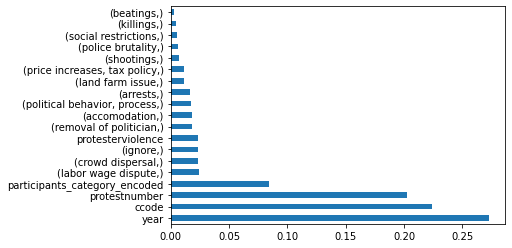

In [45]:
feat_importances = pd.Series(rf.feature_importances_, index=pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

### Correlation Heatmap

<AxesSubplot:>

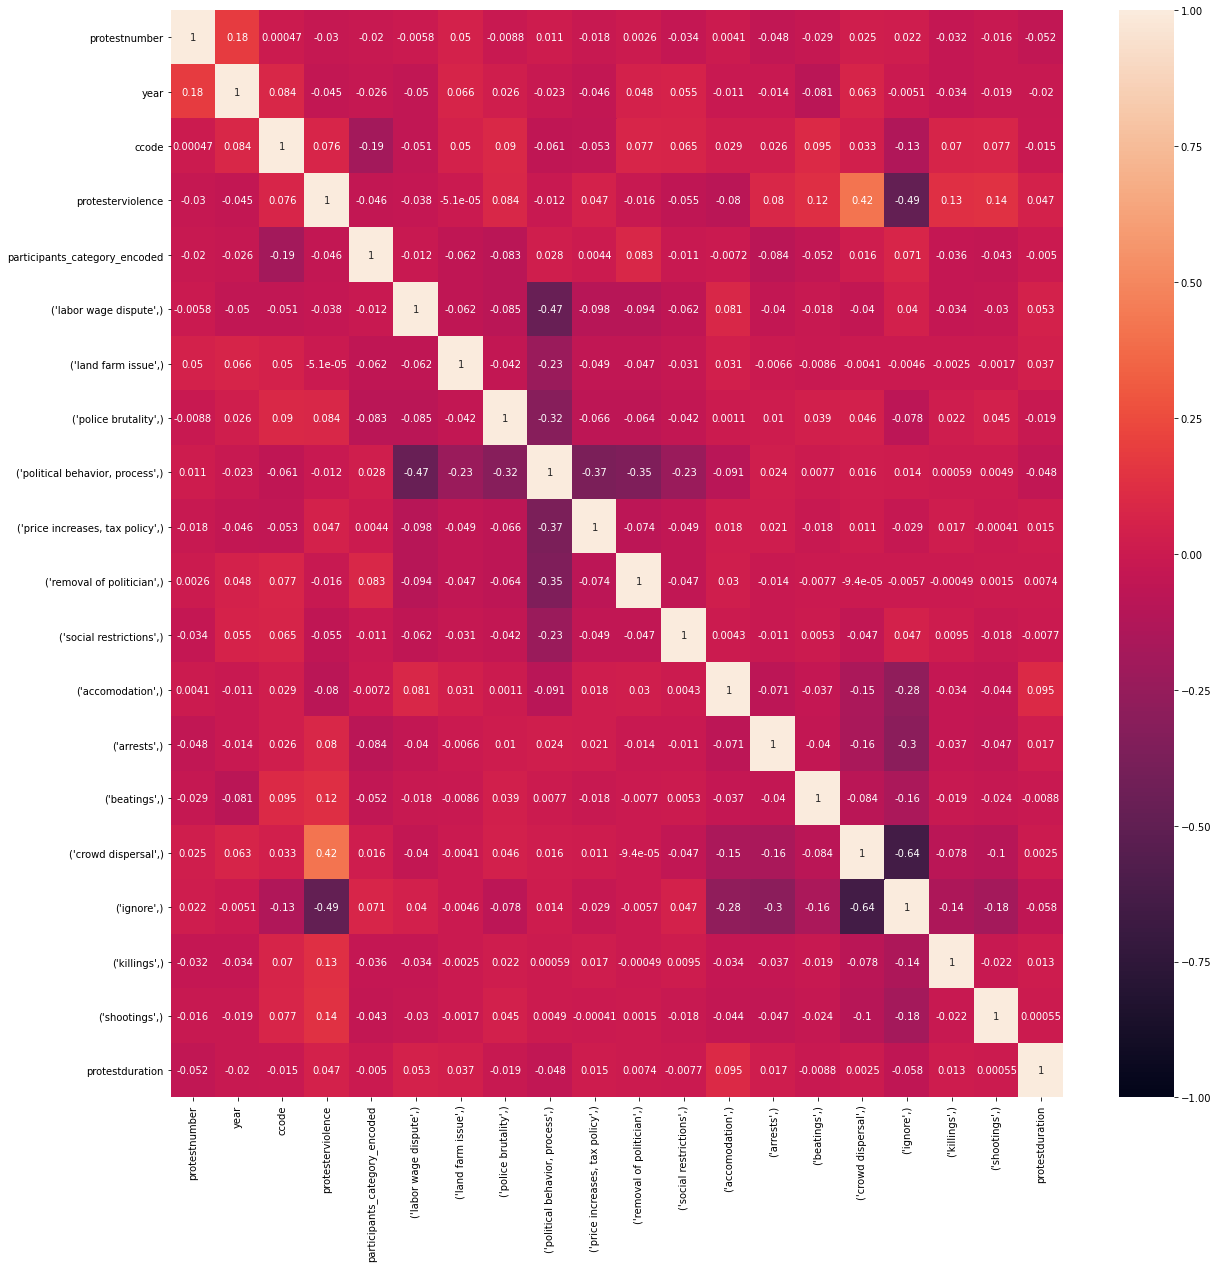

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df,data["protestduration"]],axis = 1).corr(),annot=True,vmin=-1,vmax=1)

### Mutual Information

In [57]:
test = SelectKBest(score_func=mutual_info_regression, k=5)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.loc[:,"protestduration"])
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False)

,0,1
2,ccode,0.025753
1,year,0.016080
0,protestnumber,0.014168
3,protesterviolence,0.012029
5,"(labor wage dispute,)",0.007889
13,"(arrests,)",0.006667
14,"(beatings,)",0.005870
16,"(ignore,)",0.005708
17,"(killings,)",0.005565
10,"(removal of politician,)",0.005459


### Recursive Feature Elimination on Lasso Regression

In [52]:
regression = Lasso(alpha = .5)
rfe = RFE(regression,5)
fit = rfe.fit(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1), data.loc[:,"protestduration"])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(dict(zip( list(pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1).columns),fit.support_ )))


Num Features: 5
Selected Features: [ True False  True False False False False False False False False False
 False False False False  True  True  True]
Feature Ranking: [ 1 12  1 11 10  9  8  7 14 15 13  6  5  4  3  2  1  1  1]
{'protestnumber': True, 'year': False, 'ccode': True, 'protesterviolence': False, 'participants_category_encoded': False, ('labor wage dispute',): False, ('land farm issue',): False, ('police brutality',): False, ('political behavior, process',): False, ('price increases, tax policy',): False, ('removal of politician',): False, ('social restrictions',): False, ('accomodation',): False, ('arrests',): False, ('beatings',): False, ('crowd dispersal',): False, ('ignore',): True, ('killings',): True, ('shootings',): True}


# Training Models

205,0.0,5,1,0.0

In [103]:
rf_features = ['ccode','protestnumber','participants_category_encoded','laborwagedispute','crowddispersal','ignore']
rfe_features = ['ccode','protestnumber','ignore','killings','shootings']
mi_features = ['ccode','arrests','protestnumber','protesterviolence','laborwagedispute']

In [104]:
X = pd.concat([data[features],encoded_protester_demand_df,encoded_state_response_df],axis = 1)
y = pd.DataFrame(data["protestduration"])

In [105]:
X.columns = [i for i in list(X.columns) if type(i) == str] + [str(i).strip('(').strip(')').strip("'").strip(',').strip("'") for i in list(X.columns) if type(i) == tuple]
y.columns = ['protestduration']

In [106]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y = y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [107]:
list(X.columns)

['protestnumber',
 'year',
 'ccode',
 'protesterviolence',
 'participants_category_encoded',
 'laborwagedispute',
 'landfarmissue',
 'policebrutality',
 'politicalbehaviorprocess',
 'priceincreasestaxpolicy',
 'removalofpolitician',
 'socialrestrictions',
 'accomodation',
 'arrests',
 'beatings',
 'crowddispersal',
 'ignore',
 'killings',
 'shootings']

In [108]:
X = X[mi_features]

In [65]:
# scores = []
# lgbmr = LGBMRegressor()
# cv = KFold(n_splits=10, random_state=32, shuffle=False)
# for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
#     X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
#     lgbmr.fit(X_train, y_train)
#     print("Score: ",lgbmr.score(X_test, y_test))
#     scores.append(lgbmr.score(X_test, y_test))
    
# print(np.mean(scores))

## Pipeline

In [109]:
def mean_cross_validation_score(model):
    pipeline = make_pipeline(model)
    kf = KFold(n_splits=10, random_state=32, shuffle=False)
    cv_results = -1 * cross_val_score(pipeline,X,y,cv=kf,scoring='neg_root_mean_squared_error',n_jobs=-1) 
    return np.mean(cv_results)

### Random Forest

__Without Feature Selection__

In [98]:
rfr = RandomForestRegressor()
mean_cross_validation_score(rfr)

4.071788154286027

__Feature selection based on Random Forest Feature Importance__

In [90]:
rfr = RandomForestRegressor()
mean_cross_validation_score(rfr)

4.108748283114231

__Feature selection based on Recursive Feature Elimination on Lasso Regression__

In [78]:
rfr = RandomForestRegressor()
mean_cross_validation_score(rfr)

4.039999158538673

__Feature selection based on Mutual Information Scores__

In [68]:
rfr = RandomForestRegressor()
mean_cross_validation_score(rfr)

4.016511766176771

### LightGBM Regressor

__Without Feature Selection__

In [99]:
lgbmr = LGBMRegressor()
mean_cross_validation_score(lgbmr)

3.553752079841634

__Feature selection based on Random Forest Feature Importance__

In [89]:
lgbmr = LGBMRegressor()
mean_cross_validation_score(lgbmr)

3.5635498957623235

__Feature selection based on Recursive Feature Elimination on Lasso Regression__

In [79]:
lgbmr = LGBMRegressor()
mean_cross_validation_score(lgbmr)

3.549316750957184

__Feature selection based on Mutual Information Scores__

In [69]:
lgbmr = LGBMRegressor()
mean_cross_validation_score(lgbmr)

3.548971481850735

### XGB Regressor

__Without Feature Selection__

In [101]:
xgbr = XGBRegressor()
mean_cross_validation_score(xgbr)

4.13044762528266

__Feature selection based on Random Forest Feature Importance__

In [91]:
xgbr = XGBRegressor()
mean_cross_validation_score(xgbr)

4.223195279674128

__Feature selection based on Recursive Feature Elimination on Lasso Regression__

In [80]:
xgbr = XGBRegressor()
mean_cross_validation_score(xgbr)

3.906073897853264

__Feature selection based on Mutual Information Scores__

In [70]:
xgbr = XGBRegressor()
mean_cross_validation_score(xgbr)

3.8524305231091445

### CatBoost Regressor

__Without Feature Selection__

In [102]:
catbr = CatBoostRegressor()
mean_cross_validation_score(catbr)

3.7666473317327474

__Feature selection based on Random Forest Feature Importance__

In [92]:
catbr = CatBoostRegressor()
mean_cross_validation_score(catbr)

3.7483701663906466

__Feature selection based on Recursive Feature Elimination on Lasso Regression__

In [81]:
catbr = CatBoostRegressor()
mean_cross_validation_score(catbr)

3.6606351685214875

__Feature selection based on Mutual Information Scores__

In [71]:
catbr = CatBoostRegressor()
mean_cross_validation_score(catbr)

3.677437799031176

In [144]:
np.array(X.iloc[1,:]).reshape(1,5)

array([[20.,  0.,  2.,  0.,  0.]])

In [239]:
lgbmr = LGBMRegressor()
pipeline = make_pipeline(lgbmr)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape,X_test.shape)
pipeline.fit(X_train, y_train)
print(np.floor(pipeline.predict(np.array(X_test.iloc[150,:]).reshape(1,5))))
print(y_test.iloc[150])

(11332, 5) (3778, 5)
[0.]
protestduration    0
Name: 4338, dtype: int64


In [196]:
y > 10

,protestduration
0,False
1,False
2,False
3,False
4,False
...,...
15105,False
15106,True
15107,False
15108,False


In [405]:
X_train,X_test, y_train,y_test = train_test_split(X,y)

In [406]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [408]:
pd.Series(xgbr.predict(X_test),index = y_test.index).head(20), y_test.head(20)

(14955    2.572146
 6037     0.660635
 5594     2.572146
 8950     1.045507
 7530     0.632648
 7961     0.660635
 4331     0.660635
 11045    0.660635
 2738     2.572146
 2756     0.660635
 10702    0.632648
 9358     1.926384
 9404     0.632648
 9155     2.572146
 9209     2.572146
 3652     0.660635
 3591     0.660635
 2743     0.660635
 7226     0.632648
 562      1.342175
 dtype: float32,
        protestduration
 14955                0
 6037                 0
 5594                15
 8950                 1
 7530                 0
 7961                 0
 4331                 0
 11045                0
 2738                 0
 2756                 0
 10702                0
 9358                 0
 9404                 0
 9155                 0
 9209                 0
 3652                 0
 3591                 0
 2743                 0
 7226                 0
 562                  1)

# Predicting what the response from the state will be 

# Feature Selection

In [26]:
data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes', 'startdate', 'enddate', 'protestduration(days)'],
      dtype='object')

In [4]:
data["participants_category_encoded"] = data.participants_category.replace(category_mapping)

In [5]:
protesterdemand_encoder = OneHotEncoder(handle_unknown ='ignore',sparse = False)
protesterdemand_encoder.fit(np.array(data.protesterdemand1).reshape(-1,1))
encoded_protester_demand_df = pd.DataFrame(protesterdemand_encoder.transform(np.array(data.protesterdemand1).reshape(-1,1)),columns =protesterdemand_encoder.categories_ )

In [6]:
features = ['protestnumber','year','ccode','participants_category_encoded','protestduration','protesterviolence']

In [7]:
pd.concat([data[features],encoded_protester_demand_df],axis = 1)

,protestnumber,year,ccode,participants_category_encoded,protestduration,protesterviolence,"(labor wage dispute,)","(land farm issue,)","(police brutality,)","(political behavior, process,)","(price increases, tax policy,)","(removal of politician,)","(social restrictions,)"
0,1,1990,20,2,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1990,20,2,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1990,20,2,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,1990,20,2,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,1990,20,2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,1,2014,910,2,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15106,1,2016,910,3,25,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15107,1,2017,910,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15108,2,2017,910,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Variance Threshold

In [41]:
thresholder = VarianceThreshold(threshold = 0.2)
features_high_variance = thresholder.fit_transform(MinMaxScaler(feature_range=(0, 1)).fit_transform(pd.concat([data[features],encoded_protester_demand_df],axis = 1)))
print([ float('{:f}'.format(var)) for var in thresholder.variances_])
print(list(pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns))

[0.007503, 0.08917, 0.06909, 0.118004, 0.005403, 0.19424, 0.09908, 0.029206, 0.051206, 0.231413, 0.066424, 0.061916, 0.029144]
['protestnumber', 'year', 'ccode', 'participants_category_encoded', 'protestduration', 'protesterviolence', ('labor wage dispute',), ('land farm issue',), ('police brutality',), ('political behavior, process',), ('price increases, tax policy',), ('removal of politician',), ('social restrictions',)]


## Correlation Heatmap

<AxesSubplot:>

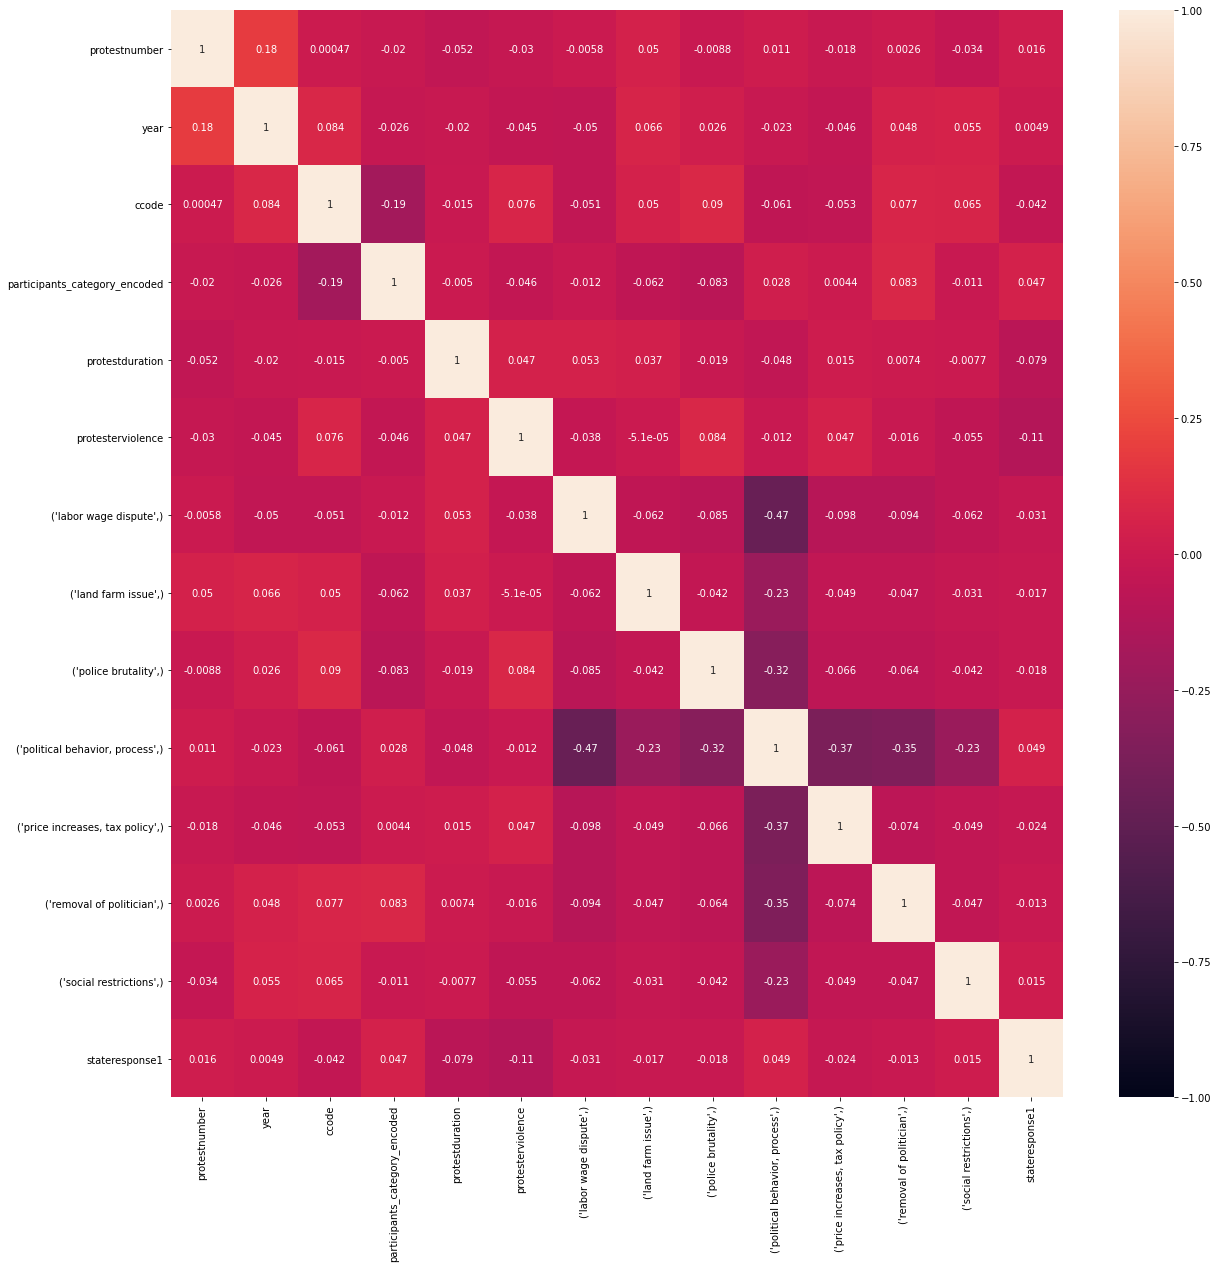

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([data[features],encoded_protester_demand_df,data.stateresponse1],axis = 1).corr(), vmin= -1, vmax = 1, annot = True)

## ANOVA F-test

In [44]:
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df],axis = 1), data.stateresponse1)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(10)

,0,1
5,protesterviolence,1077.667832
2,ccode,74.966467
3,participants_category_encoded,37.895181
6,"(labor wage dispute,)",29.990177
1,year,28.592232
4,protestduration,26.540441
9,"(political behavior, process,)",21.964866
8,"(police brutality,)",21.259295
0,protestnumber,12.239569
12,"(social restrictions,)",8.188604


# Chai Square Test

In [45]:
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df],axis = 1), data.stateresponse1)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(10)

,0,1
2,ccode,55421.680380
5,protesterviolence,3334.478765
4,protestduration,2780.247710
0,protestnumber,1323.711497
3,participants_category_encoded,246.129090
6,"(labor wage dispute,)",158.065698
8,"(police brutality,)",119.695373
9,"(political behavior, process,)",47.534732
12,"(social restrictions,)",47.522889
10,"(price increases, tax policy,)",24.516260


## Mutual Information

In [46]:
test = SelectKBest(score_func=mutual_info_classif, k=7)
fit = test.fit(pd.concat([data[features],encoded_protester_demand_df],axis = 1), data.stateresponse1)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(10)

,0,1
2,ccode,0.158704
5,protesterviolence,0.149095
1,year,0.018860
4,protestduration,0.015909
9,"(political behavior, process,)",0.009392
6,"(labor wage dispute,)",0.007512
0,protestnumber,0.007484
3,participants_category_encoded,0.005378
12,"(social restrictions,)",0.003061
11,"(removal of politician,)",0.003005


## Random Forest Feature Importance

In [47]:
rf = RandomForestClassifier()

fit = rf.fit(pd.concat([data[features],encoded_protester_demand_df],axis = 1), data.stateresponse1)
pd.DataFrame(zip( list(pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns),fit.feature_importances_ )).sort_values(by=1,ascending = False).head(10)

,0,1
2,ccode,0.261639
1,year,0.229911
0,protestnumber,0.216913
5,protesterviolence,0.143465
3,participants_category_encoded,0.059764
4,protestduration,0.041441
9,"(political behavior, process,)",0.010652
6,"(labor wage dispute,)",0.007130
10,"(price increases, tax policy,)",0.007094
11,"(removal of politician,)",0.006901


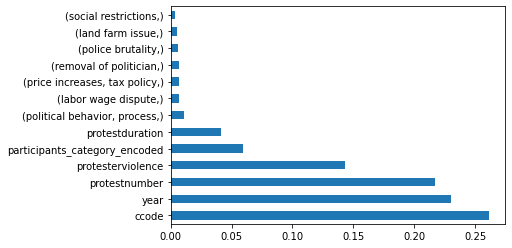

In [48]:
feat_importances = pd.Series(rf.feature_importances_, index=pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

### Recursive Feature Elimination on Logistic Regression

In [51]:
classification = LogisticRegression()
rfe = RFE(classification,7)
fit = rfe.fit(pd.concat([data[features],encoded_protester_demand_df],axis = 1), data.loc[:,"stateresponse1"])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(dict(zip( list(pd.concat([data[features],encoded_protester_demand_df],axis = 1).columns),fit.support_ )))


Num Features: 7
Selected Features: [ True  True  True  True  True  True False False False  True False False
 False]
Feature Ranking: [1 1 1 1 1 1 2 7 3 1 5 6 4]
{'protestnumber': True, 'year': True, 'ccode': True, 'participants_category_encoded': True, 'protestduration': True, 'protesterviolence': True, ('labor wage dispute',): False, ('land farm issue',): False, ('police brutality',): False, ('political behavior, process',): True, ('price increases, tax policy',): False, ('removal of politician',): False, ('social restrictions',): False}


In [120]:
[{"label":country,"value":ccode} for country,ccode in zip(data.loc[:, ['country', 'ccode']].drop_duplicates().country,
                                                         data.loc[:, ['country', 'ccode']].drop_duplicates().ccode)]

[{'label': 'Canada', 'value': 20},
 {'label': 'Cuba', 'value': 40},
 {'label': 'Haiti', 'value': 41},
 {'label': 'Dominican Republic', 'value': 42},
 {'label': 'Jamaica', 'value': 51},
 {'label': 'Mexico', 'value': 70},
 {'label': 'Guatemala', 'value': 90},
 {'label': 'Honduras', 'value': 91},
 {'label': 'El Salvador', 'value': 92},
 {'label': 'Nicaragua', 'value': 93},
 {'label': 'Costa Rica', 'value': 94},
 {'label': 'Panama', 'value': 95},
 {'label': 'Colombia', 'value': 100},
 {'label': 'Venezuela', 'value': 101},
 {'label': 'Guyana', 'value': 110},
 {'label': 'Suriname', 'value': 115},
 {'label': 'Ecuador', 'value': 130},
 {'label': 'Peru', 'value': 135},
 {'label': 'Brazil', 'value': 140},
 {'label': 'Bolivia', 'value': 145},
 {'label': 'Paraguay', 'value': 150},
 {'label': 'Chile', 'value': 155},
 {'label': 'Argentina', 'value': 160},
 {'label': 'Uruguay', 'value': 165},
 {'label': 'United Kingdom', 'value': 200},
 {'label': 'Ireland', 'value': 205},
 {'label': 'Netherlands', 'v

In [ ]:
country_dict = {country: ccode for country, ccode in zip(data.loc[:, ['country', 'ccode']].drop_duplicates().country,
                                                         data.loc[:, ['country', 'ccode']].drop_duplicates().ccode)}

# Training models

In [123]:
data.ccode

0         20
1         20
2         20
3         20
4         20
        ... 
15105    910
15106    910
15107    910
15108    910
15109    910
Name: ccode, Length: 15110, dtype: int64

In [45]:
rf_features = ['ccode','protestnumber','participants_category_encoded','protestduration','year','protesterviolence']
rfe_features = ['ccode','protestnumber','participants_category_encoded','protestduration','year','protesterviolence']
anova_features = ['ccode','participants_category_encoded','protestduration','year','protesterviolence','laborwagedispute']
chi_2_features = ['ccode','protestnumber','participants_category_encoded','protestduration','laborwagedispute','protesterviolence']
mi_features = ['ccode','protestduration','year','protesterviolence','politicalbehaviorprocess']
self_features = ['ccode','participants_category_encoded','protesterviolence']

In [46]:
X = pd.concat([data[features],encoded_protester_demand_df],axis = 1)
y = pd.DataFrame(data.stateresponse1)

In [47]:
X.columns = [i for i in list(X.columns) if type(i) == str] + [str(i).strip('(').strip(')').strip("'").strip(',').strip("'") for i in list(X.columns) if type(i) == tuple]
y.columns = ['stateresponse1']

In [48]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y = y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [49]:
X = X[self_features]

In [111]:
# scores = []
# lgbmr = LGBMRegressor()
# cv = KFold(n_splits=10, random_state=32, shuffle=False)
# for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
#     X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
#     lgbmr.fit(X_train, y_train)
#     print("Score: ",lgbmr.score(X_test, y_test))
#     scores.append(lgbmr.score(X_test, y_test))
    
# print(np.mean(scores))

## Pipeline

In [14]:
def f1_cross_validation_score(model):
    pipeline = make_pipeline(model)
    skf = StratifiedKFold(n_splits=5, random_state=31, shuffle=True)
    scorer = make_scorer(f1_score, average = 'micro')
    cv_results = cross_val_score(pipeline,X,y,cv=skf,scoring=scorer,n_jobs=-1) 
    return np.mean(cv_results)

### Random Forest

__Without Feature Selection__

In [92]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.5444392626283714

__Feature selection based on Random Forest Feature Importance__

In [105]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6355393778954335

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [95]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6394440767703509

__Feature selection based on ANOVA F-test Scores__

In [129]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.627001985440106

__Feature selection based on Chi Square Test scores__

In [138]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.5990072799470549

__Feature selection based on Mutual Information scores__

In [120]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6285903375248181

__Feature selection based on Pearson Correlation scores__

In [293]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6516310624925327

__Feature selection based on self chosen features__

In [50]:
rfc = RandomForestClassifier()
f1_cross_validation_score(rfc)

0.6517538054268696

### LightGBM Classifier

__Without Feature Selection__

In [93]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.5611620205122136

__Feature selection based on Random Forest Feature Importance__

In [106]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6697551290536069

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [52]:
lgbmc = LGBMClassifier()
X_train,X_test, y_train,y_test = train_test_split(X,y)
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

clf = GridSearchCV(lgbmc,parameters,scoring='accuracy',verbose = 10, n_jobs = -1)
clf.fit(X=X_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

{'learning_rate': 0.05, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 20, 'reg_alpha': 0.03}
Classification of the result is:
0.6646373742721017


In [53]:
# lgbmc = LGBMClassifier(learning_rate= 0.05, max_depth= -1, min_child_samples= 10, num_leaves= 20, reg_alpha= 0)
lgbmc = LGBMClassifier(learning_rate= 0.05, max_depth= 20, min_child_samples= 15, num_leaves= 20, reg_alpha= 0.03)
# 'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 15, 'num_leaves': 40, 'reg_alpha': 0.03
    
print(f1_cross_validation_score(lgbmc))

0.6663798808735937


In [54]:
lgbmc = LGBMClassifier(learning_rate= 0.05, max_depth= 20, min_child_samples= 15, num_leaves= 20, reg_alpha= 0.03)
pipeline = make_pipeline(lgbmc)
skf = StratifiedKFold(n_splits=5, random_state=31, shuffle=True)
for X_train_index,X_test_index in skf.split(X,y):
    pipeline.fit(X.iloc[X_train_index,:],y.iloc[X_train_index,:])
    print(pd.Series(pipeline.predict(X.iloc[X_test_index,:])),y.iloc[X_test_index,:])

0       5
1       5
2       5
3       5
4       4
       ..
3017    5
3018    5
3019    5
3020    5
3021    5
Length: 3022, dtype: int64        stateresponse1
0                   5
2                   5
4                   4
5                   5
21                  2
...               ...
15083               1
15086               5
15092               5
15097               5
15098               5

[3022 rows x 1 columns]
0       2
1       5
2       2
3       2
4       5
       ..
3017    5
3018    5
3019    5
3020    5
3021    5
Length: 3022, dtype: int64        stateresponse1
12                  7
15                  5
16                  5
19                  4
25                  5
...               ...
15065               5
15068               5
15078               1
15085               5
15089               5

[3022 rows x 1 columns]
0       4
1       5
2       5
3       5
4       5
       ..
3017    4
3018    4
3019    5
3020    4
3021    5
Length: 3022, dtype: int64        stat

__Feature selection based on ANOVA F-test Scores__

In [130]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6680344142951687

__Feature selection based on Chi Square Test scores__

In [139]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6632693580410324

__Feature selection based on Mutual Information scores__

In [121]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6673726009265387

__Feature selection based on Pearson Correlation scores__

In [294]:
lgbmc = LGBMClassifier()
f1_cross_validation_score(lgbmc)

0.6516310624925327

__Feature selection based on self chosen features__

### XGB Classifier

__Without Feature Selection__

In [94]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.5526395463085763

__Feature selection based on Random Forest Feature Importance__

In [107]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6642620780939774

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [97]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6642620780939774

__Feature selection based on ANOVA F-test Scores__

In [131]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6659827928524156

__Feature selection based on Chi Square Test scores__

In [140]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6615486432825943

__Feature selection based on Mutual Information scores__

In [122]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6653871608206486

__Feature selection based on Pearson Correlation scores__

In [295]:
xgbc = XGBClassifier()
f1_cross_validation_score(xgbc)

0.6516310624925327

__Feature selection based on self chosen features__

### CatBoost Classifier

__Without Feature Selection__

In [95]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.5649094272960318

__Feature selection based on Random Forest Feature Importance__

In [108]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6671078755790867

__Feature selection based on Recursive Feature Elimination on Logistic Regression__

In [98]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6671078755790867

__Feature selection based on ANOVA F-test Scores__

In [132]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6628722700198544

__Feature selection based on Chi Square Test scores__

In [141]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6634017207147584

__Feature selection based on Mutual Information scores__

In [123]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6663798808735936

__Feature selection based on Pearson Correlation scores__

In [296]:
catbc = CatBoostClassifier()
f1_cross_validation_score(catbc)

0.6516310624925327

__Feature selection based on self chosen features__